Product Price Prediction | Predicting Used Car Prices | May Cooper

## Objective: Predicting the Sale Price of Used Cars

The primary goal of this project is to develop a machine learning model that can accurately predict the sale price of used cars in India. By providing statistical insights into the used car market, this project aims to help individuals make informed buying decisions and secure a fair deal on a used vehicle.

### Key Questions to Address

Throughout the analysis, we will explore the following questions to gain a deeper understanding of the used car market:

- What is the average price of a used car in India?
- What is the average number of kilometers driven by a used car?
- Which car features have the most significant impact on the selling price?

### Machine Learning Objective

The core objective from a machine learning perspective is to minimize the discrepancy between the actual selling prices and the prices estimated by our model. To achieve this, we will employ a supervised learning regression algorithm, focusing on the following performance metrics:

- **Mean Squared Error (MSE)**: This metric measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. Lower values indicate better model performance.

- **Root Mean Squared Error (RMSE)**: The square root of the MSE, this metric provides a measure of the differences between predicted and actual values. Like MSE, lower RMSE values indicate a better fit of the model to the data.

- **R-squared (R²)**: This statistic provides an indication of how well the model's predictions approximate the real data points. An R² value closer to 1 signifies a model that explains a higher proportion of the variance in the dependent variable (selling price).

By evaluating our model against these metrics, we aim to develop a reliable and accurate predictive tool for estimating the sale price of used cars base on various features.


In [115]:
# Import required libraries for EDA and Data Preparation

#matplotlib
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8

#math libraries
import numpy as np
import pandas as pd
import numpy.random as nr
from scipy import stats
import time
import datetime
import tensorflow as tf
# Import library to hide warnings
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [116]:
#seaborn
import seaborn as sns

#sklearn
from sklearn.preprocessing import MinMaxScaler

#ploty
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [117]:
# License - CC0: Public Domain
# Domain - Public
# Sources - Kaggle
# Dataset owner - Nehal Birla
# Date created - 2018-06-24

# Read the dataset & check that all dtypes are correct 
df= pd.read_csv('Car details v3.csv')
df.head()
df.describe()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [118]:
df.shape

(8128, 13)

## Target Variable

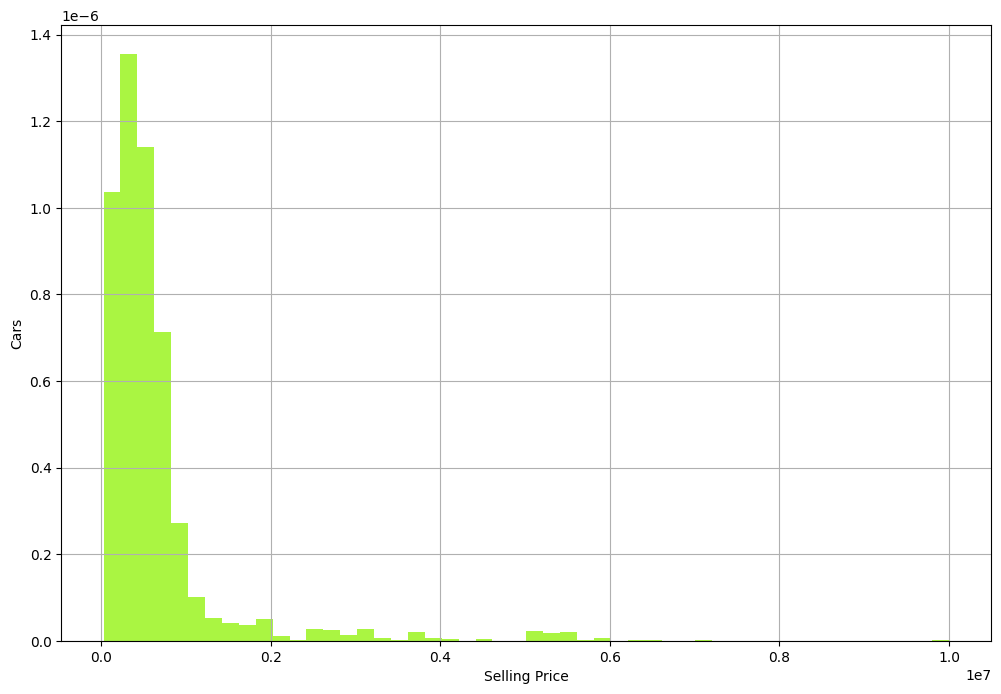

In [119]:
# histogran to evaluate target distribution

df['selling_price'].hist(bins=50, density=True,color='#aaf542')
plt.ylabel('Cars')
plt.xlabel('Selling Price')
plt.show();

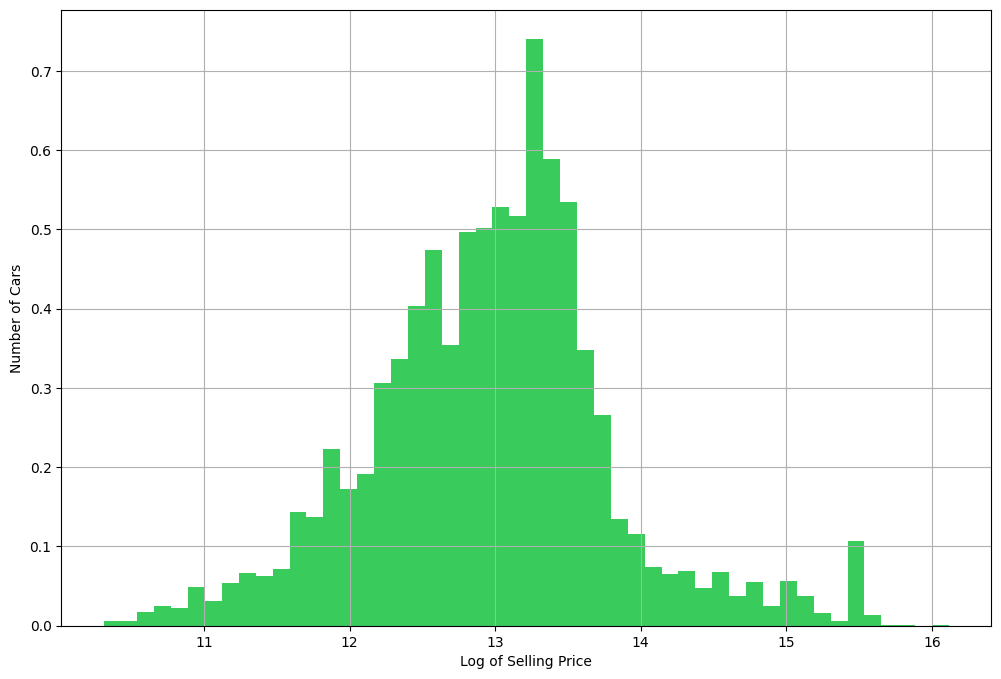

In [120]:
# Let's apply a logarithmic function to scale the target variable

np.log(df['selling_price']).hist(bins=50, density=True,color='#39cc5c')
plt.ylabel('Number of Cars')
plt.xlabel('Log of Selling Price')
plt.show();

## Variable Types

Next, let's identify the categorical and numerical variables

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


## Detecting Nulls

In [122]:
#How much of the nulls in percent? 
percentNull = df.isnull().sum()*100 /len(df)
percentNull.sort_values(ascending = False).head(10)

torque           2.731299
mileage          2.718996
engine           2.718996
seats            2.718996
max_power        2.645177
name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
dtype: float64

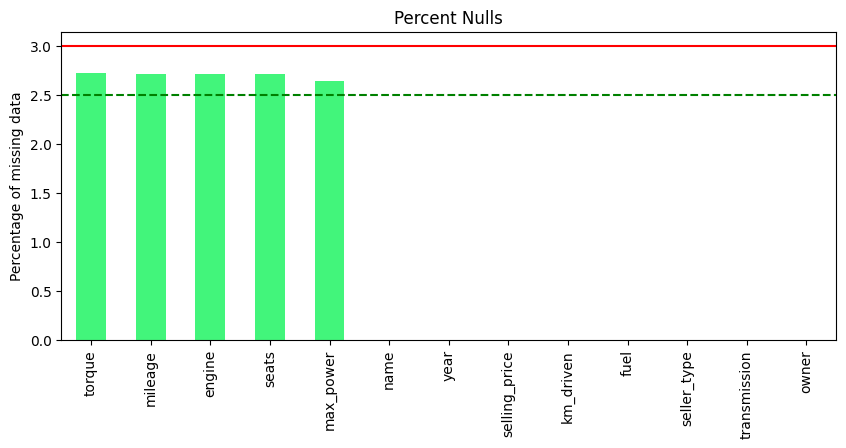

In [123]:
# plotting nulls
percentNull.sort_values(ascending = False).plot.bar(figsize=(10, 4), color='#42f57b')
plt.ylabel('Percentage of missing data')
plt.axhline(y=3, color='r', linestyle='-')
plt.axhline(y=2.5, color='g', linestyle='--')
plt.title('Percent Nulls')

plt.show();

## Feature Engineering & Outlier Removal

In [124]:
# Using domain knowledge, we see that the price is in Indian Rupee
# Therefore, we reengineer the price column and convert it to USD (exchange rate of Aug, 2021)
df.selling_price = df.selling_price*0.01345212

Number of rows before: 8128
Number of rows after: 8124


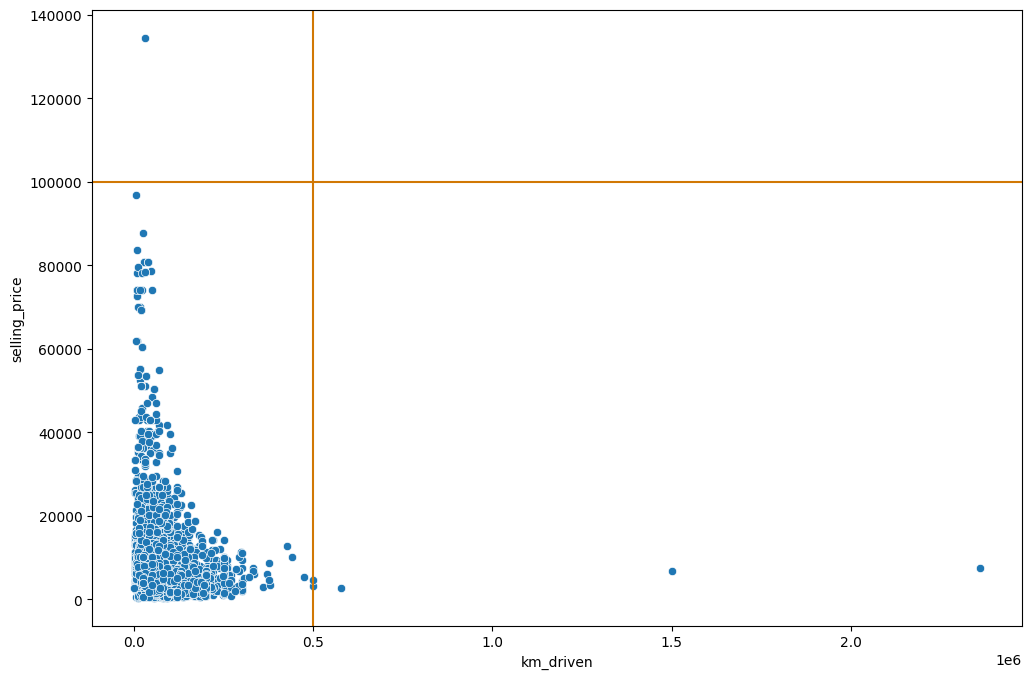

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier removal of Kms driven and selling price
# Using seaborn scatterplot properly with the DataFrame and column names
sns.scatterplot(data=df, x='km_driven', y='selling_price')
plt.axvline(x=500000, color='#d17804')  # Vertical line for outlier threshold on km_driven
plt.axhline(y=100000, color='#d17804')  # Horizontal line for outlier threshold on selling_price
print(f"Number of rows before: {df.shape[0]}")

# Removing outliers
df = df[df['km_driven'] <= 500000]
df = df[df['selling_price'] <= 100000]
print(f"Number of rows after: {df.shape[0]}")

plt.show();

In [126]:
#Re-engineering the horsepower column to be a float with not string values
df["horse_power"] = ""
df[["max_power", 'horse_power']] = df.max_power.str.split(" ", expand = True)
# Drop temp column
df.drop("horse_power",axis=1,inplace=True)
df.max_power = df.max_power.apply(pd.to_numeric, errors='ignore')
# Confirm dtypr of column
print(f'The column dtype is {df.max_power.dtypes}')

df.head()

The column dtype is float64


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,6053.45400,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,4977.28440,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,2125.43496,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,3026.72700,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,1748.77560,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [127]:
# Imputing the null values in the horsepower column with the median
print(f"Number of Nulls Before: {df.max_power.isnull().sum()}")
df.max_power.fillna(df.max_power.median(),inplace=True)
print(f"Number of Nulls After: {df.max_power.isnull().sum()}")

Number of Nulls Before: 216
Number of Nulls After: 0


In [128]:
#Re-engineering the mileage column to be a float with no string values
df["kms"] = " "
df[["mileage", 'kms']] = df.mileage.str.split(" ", n=1, expand = True)
# Drop kms column
df.mileage = df.mileage.apply(pd.to_numeric, errors='ignore')
df.drop("kms", axis=1,inplace=True)
print(f'The column dtype is {df.mileage.dtypes}')

df.head()

The column dtype is float64


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,6053.45400,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,4977.28440,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,2125.43496,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,3026.72700,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,1748.77560,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [129]:
#Re-engineering the engine column to be a float with no string values
df["engine1"] = " "
df[["engine", 'engine1']] = df.engine.str.split(" ", n=1, expand = True)
# Drop kms column
df.engine = df.engine.apply(pd.to_numeric, errors='ignore')
df.drop("engine1", axis=1,inplace=True)
print(f'The column dtype is {df.engine.dtypes}')
df.head()

The column dtype is float64


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,6053.45400,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,4977.28440,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,2125.43496,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,3026.72700,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,1748.77560,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


### Checking how the torque column affects price packages

In [130]:
#Check if the torque column is necessary for the data 
#Looking at domain knowledge information 
# https://www.wheels.ca/news/dont-confuse-torque-with-power/ 
# Above site talks about the influence torque has on price packages for cars
# More sources that mention torque as an influencer on price https://www.hotcars.com/top-24-least-expensive-cars-with-the-most-torque/

#### After looking at various different articles it is apparent that the torque column must be kept

In [131]:
df.torque.unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', nan, '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '200Nm@ 1750rpm', '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm',
       '114Nm@ 3500rpm', '115Nm@ 4000rpm', '69Nm@ 3500rpm',
       '172.5Nm@ 1750rpm', '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm',
       '60Nm@ 3500rpm', '90Nm@ 3500rpm', '151Nm@ 4850rpm',
       '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm',
       '145Nm@ 4600rpm', '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm',
       '200Nm@ 1400-3400rpm', '200Nm@ 1250-4000rpm',
       '400Nm@ 2000-2500rpm', '138Nm@ 4400rpm', '360Nm@ 1200-3400rpm',
       '200Nm@ 1200-3600rpm', '380Nm@ 1750-2500rpm', '173Nm@ 4000rpm',
       '400Nm@ 1750-3000rpm', '400Nm@ 1400-2800rpm',
       '200Nm@ 1750-3000rp

In [132]:
#Cleaning the torque column 
df["Nm"] = " "
df[["torque", 'Nm']] = df.torque.str.split("Nm", n=1, expand = True)
df[["torque", 'Nm']] = df.torque.str.split("nm", n=1, expand = True)
df[["torque", 'Nm']] = df.torque.str.split("NM", n=1, expand = True)

df["at"] = " "
df[["torque", 'at']] = df.torque.str.split("@", n=1, expand = True)

df["K"] = " "
df[["torque", 'K']] = df.torque.str.split("K", n=1, expand = True)
df[["torque", 'K']] = df.torque.str.split("k", n=1, expand = True)

df["brak"] = " "
df[["torque", 'brak']] = df.torque.str.split("(", n=1, expand = True)
df[["torque", 'brak']] = df.torque.str.split("/", n=1, expand = True)

In [133]:
#Converting dtypes to float
df.torque = df.torque.apply(pd.to_numeric, errors='ignore')
print(f'The column dtype is {df.torque.dtypes}')
#Checking the unique values 
# pd.set_option('display.max_rows', None)
df.torque
# pd.reset_option("max_rows")

The column dtype is float64


0       190.0
1       250.0
2        12.7
3        22.4
4        11.5
        ...  
8123    113.7
8124     24.0
8125    190.0
8126    140.0
8127    140.0
Name: torque, Length: 8124, dtype: float64

In [134]:
#We must convert every record that 
df['updated_torque'] = np.where((df['at'].str.contains('kgm')),df['torque']*9.8,df['torque'])

df['updated_torque'] = np.where((df['K'].str.contains('gm')),df['updated_torque']*9.8,df['updated_torque'])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Nm,at,K,brak,updated_torque
0,Maruti Swift Dzire VDI,2014,6053.45400,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0,None,None,None,None,190.00
1,Skoda Rapid 1.5 TDI Ambition,2014,4977.28440,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0,None,None,None,None,250.00
2,Honda City 2017-2020 EXi,2006,2125.43496,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,12.7,5.0,None,"2,700(kgm@ rpm)",None,None,124.46
3,Hyundai i20 Sportz Diesel,2010,3026.72700,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4,5.0,None,None,gm at 1750-2750rpm,None,219.52
4,Maruti Swift VXI BSIII,2007,1748.77560,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.5,5.0,None,"4,500(kgm@ rpm)",None,None,112.70


In [135]:
# Drop unecessary columns after above cleaning and transformations
df.drop(['torque','Nm','at','K','brak'],inplace=True,axis=1)

## Imputing Nulls

In [136]:
#How much of the nulls in percent? 
percentNull = df.isnull().sum()*100 /len(df)
percentNull.sort_values(ascending = False).head(10)

updated_torque    2.732644
mileage           2.720335
engine            2.720335
seats             2.720335
name              0.000000
year              0.000000
selling_price     0.000000
km_driven         0.000000
fuel              0.000000
seller_type       0.000000
dtype: float64

In [137]:
# Imputing the null values in the torque column with the median
print(f"Number of Nulls Before: {df.updated_torque.isnull().sum()}")
df.updated_torque.fillna(df.updated_torque.median(),inplace=True)
print(f"Number of Nulls After: {df.updated_torque.isnull().sum()}")

Number of Nulls Before: 222
Number of Nulls After: 0


In [138]:
# Imputing the null values in the mileage column with the median
print(f"Number of Nulls Before: {df.mileage.isnull().sum()}")
df.mileage.fillna(df.mileage.median(),inplace=True)
print(f"Number of Nulls After: {df.mileage.isnull().sum()}")

Number of Nulls Before: 221
Number of Nulls After: 0


In [139]:
# Imputing the null values in the engine column with the median
print(f"Number of Nulls Before: {df.engine.isnull().sum()}")
df.engine.fillna(df.engine.median(),inplace=True)
print(f"Number of Nulls After: {df.engine.isnull().sum()}")

Number of Nulls Before: 221
Number of Nulls After: 0


In [140]:
# Imputing the null values in the seats column with the median
print(f"Number of Nulls Before: {df.seats.isnull().sum()}")
df.seats.fillna(df.seats.median(),inplace=True)
print(f"Number of Nulls After: {df.seats.isnull().sum()}")

Number of Nulls Before: 221
Number of Nulls After: 0


In [141]:
#How much of the nulls in percent after imputation? 
percentNull = df.isnull().sum()*100 /len(df)
percentNull.sort_values(ascending = False).head(10)

name             0.0
year             0.0
selling_price    0.0
km_driven        0.0
fuel             0.0
seller_type      0.0
transmission     0.0
owner            0.0
mileage          0.0
engine           0.0
dtype: float64

In [142]:
#Checking shape of the data
print(f'This {df.shape} is the number of rows and columns in our dataset')

This (8124, 13) is the number of rows and columns in our dataset


In [143]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,updated_torque
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,2013.805145,8571.718108,69303.928237,19.413469,1452.824963,91.225129,5.405465,179.940519
std,4.044115,10757.882803,47640.408539,3.974708,498.194262,35.213540,0.948793,107.788823
min,1983.000000,403.550148,1.000000,0.000000,624.000000,0.000000,2.000000,14.900000
25%,2011.000000,3430.277148,35000.000000,16.800000,1197.000000,68.100000,5.000000,112.000000
50%,2015.000000,6053.454000,60000.000000,19.300000,1248.000000,82.000000,5.000000,170.000000
75%,2017.000000,9080.181000,98000.000000,22.277500,1582.000000,101.000000,5.000000,205.000000
max,2020.000000,96855.264000,500000.000000,33.440000,3604.000000,282.000000,14.000000,1862.000000


In [144]:
#Separate car models from car brands
df["model"] = " "
df[["name", 'model']] = df.name.str.split(" ", n=1, expand = True)

## EDA 

#### What if we could delevop a model that would allow you to put in the model of the car that would calculate if its a good deal, or overvalued? Something that would determine this based on known variables such as age, kms driven, fuel type, etc., and give you a recommendation? 

#### 7 things that need to be considered when buying a vehicle:

- Price 
- Age of Car
- Engine Type/Transmission
- Torque
- Horsepower
- Fuel Type
- Seller type


<Axes: >

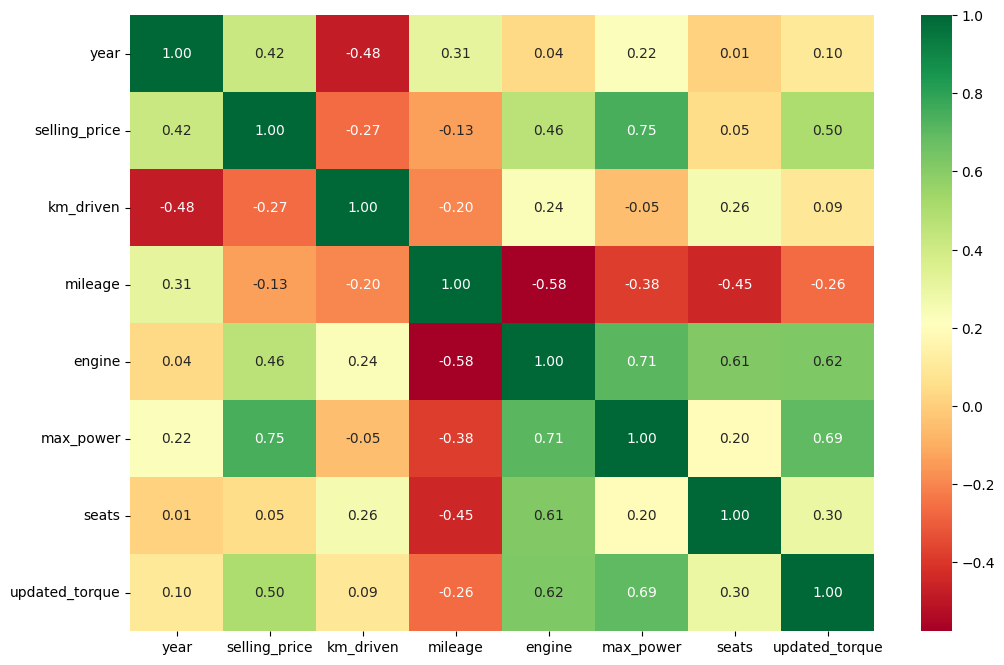

In [145]:
# Lets explore the features in this dataset and see where correlations lie 
# Plot corelation of these columns
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[float, int])

# Plotting the heatmap of correlations among numeric features
sns.heatmap(numeric_df.corr(), annot=True, cmap="RdYlGn", fmt=".2f")
plt.show()


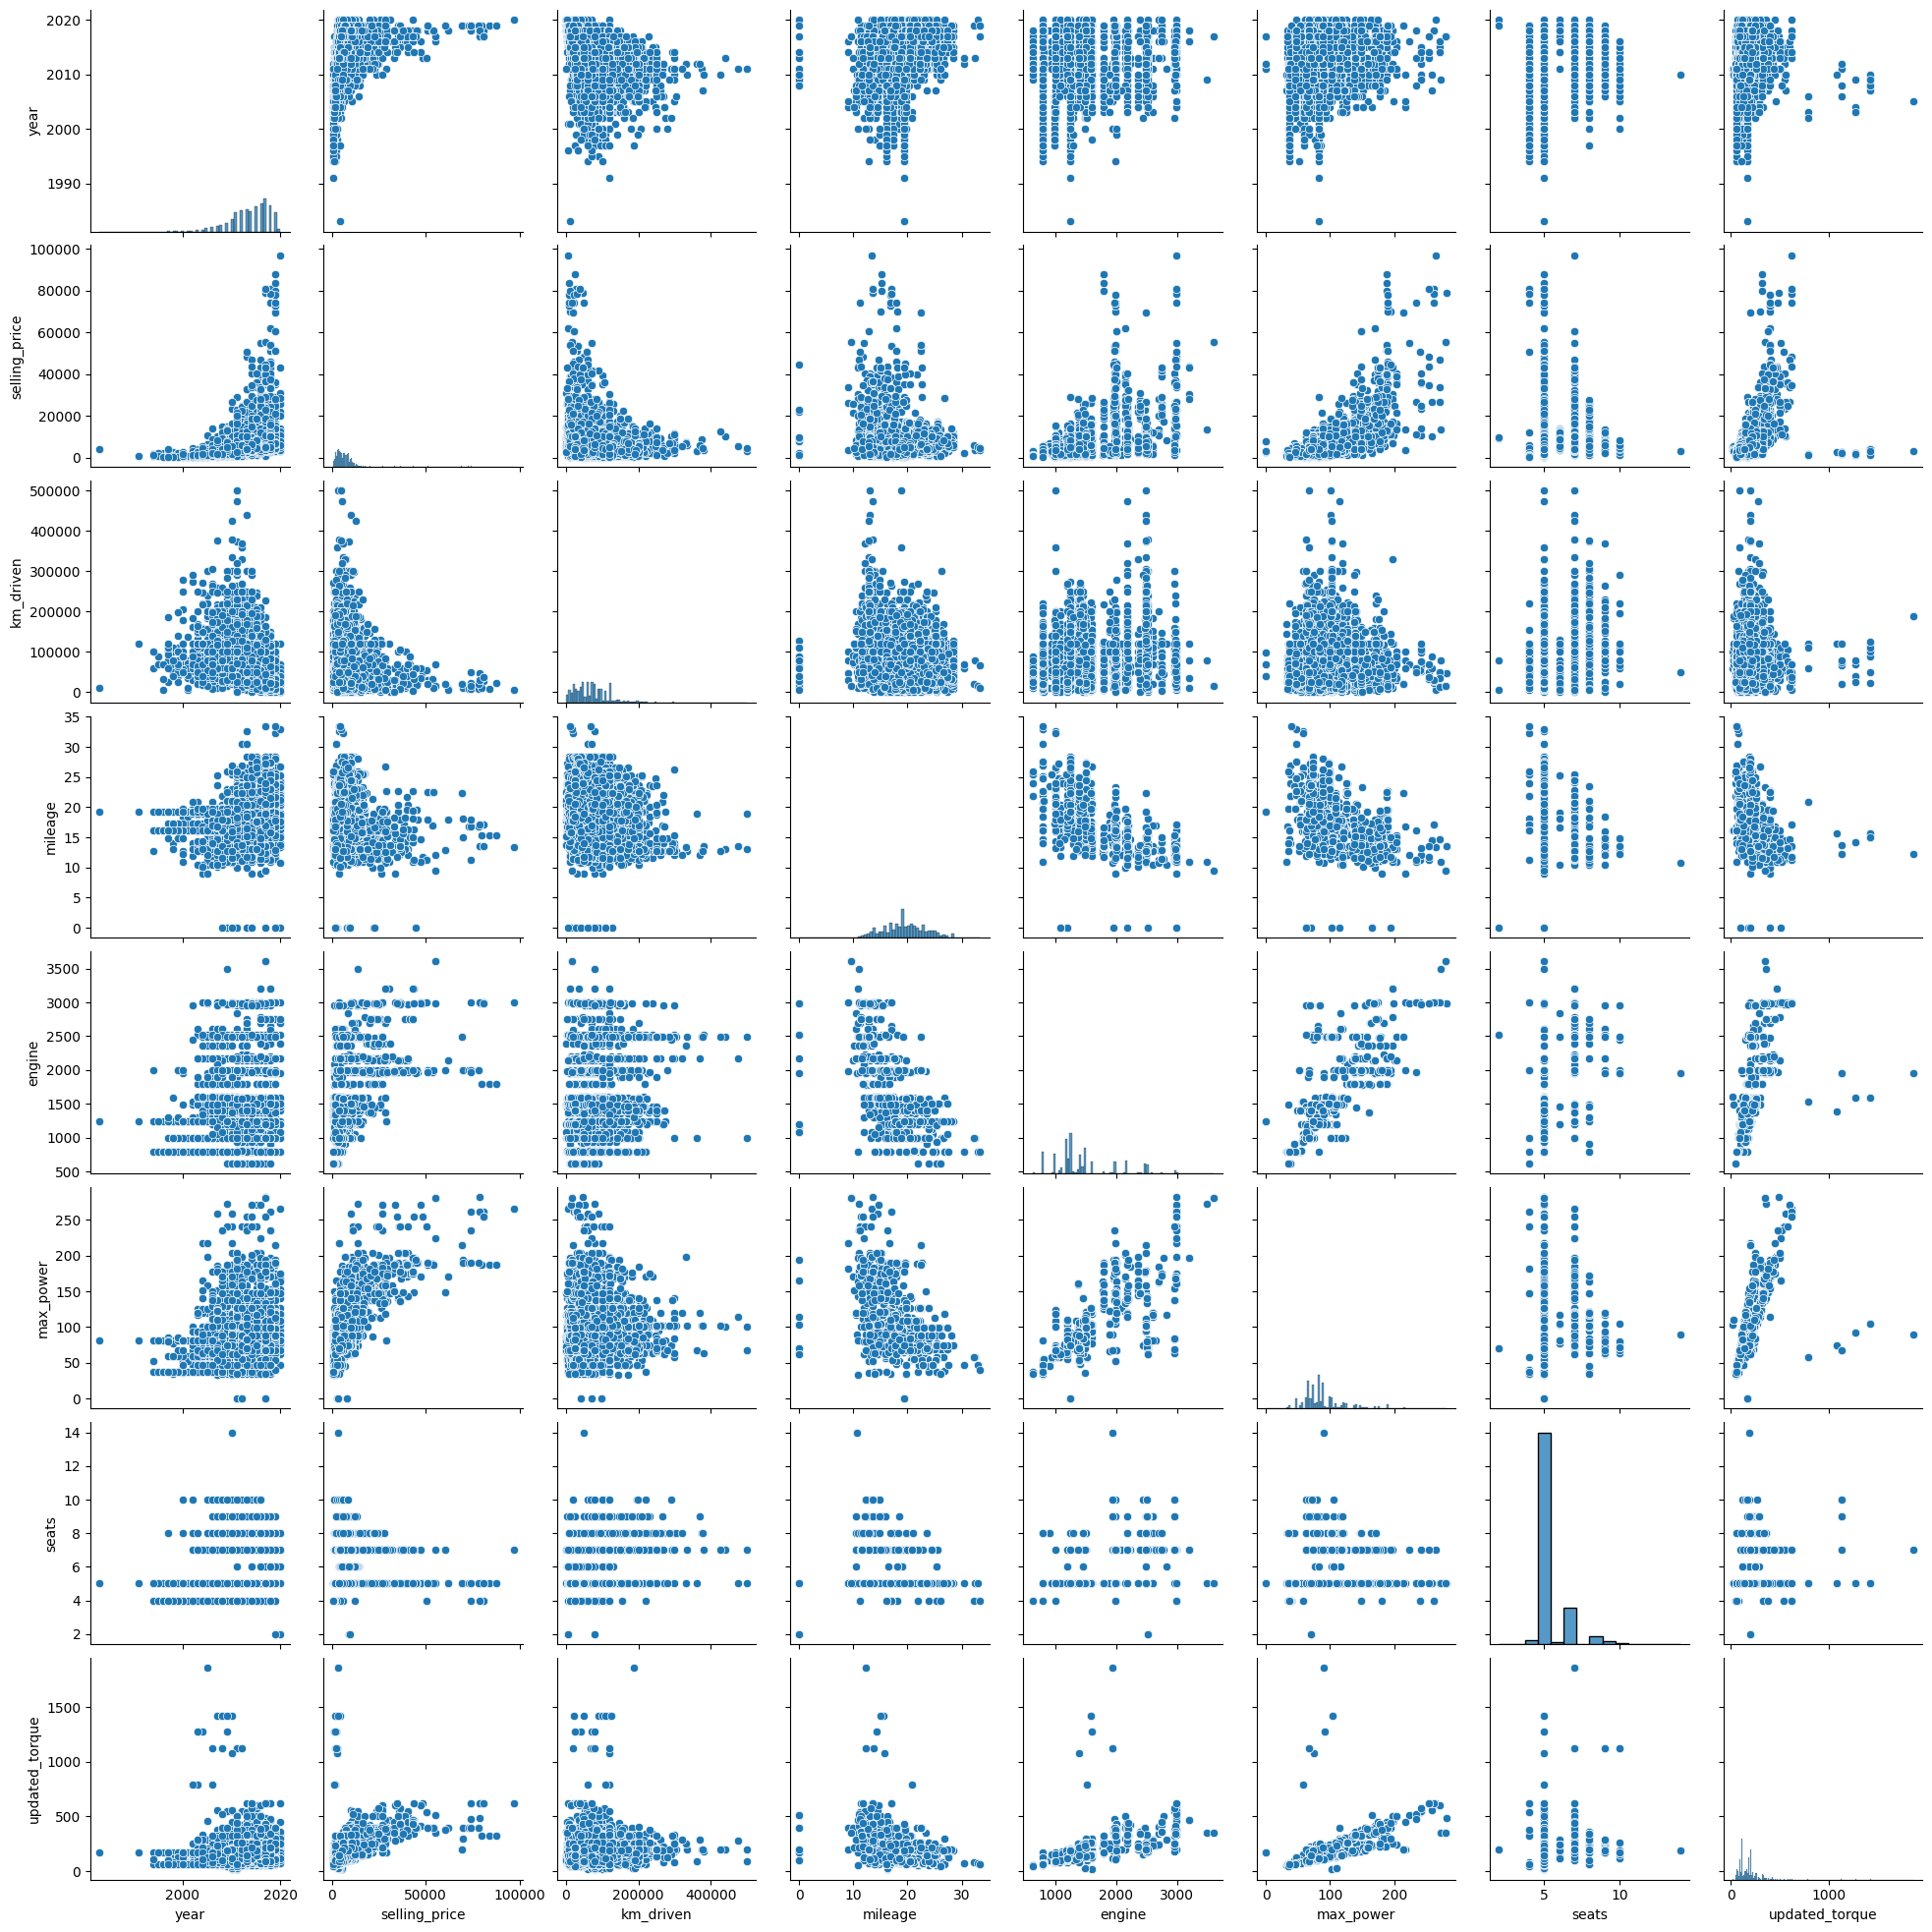

In [146]:
sns.pairplot(df)

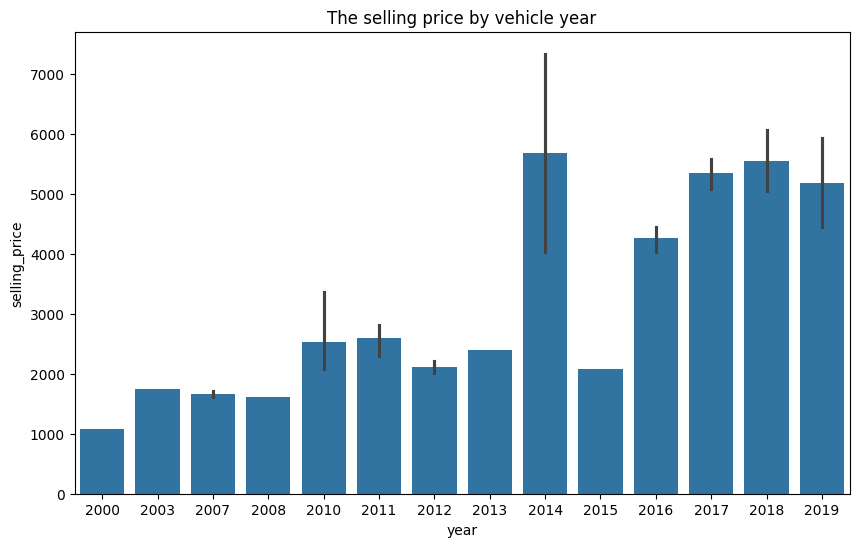

In [147]:
top_selling = df.sort_values(by='fuel', ascending=True)[:30]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=top_selling.selling_price, x=top_selling.year)
plt.xticks()
plt.xlabel('year')
plt.ylabel('selling_price')
plt.title('The selling price by vehicle year')
plt.show();

In [148]:
df.name.value_counts()

name
Maruti           2447
Hyundai          1414
Mahindra          771
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              66
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

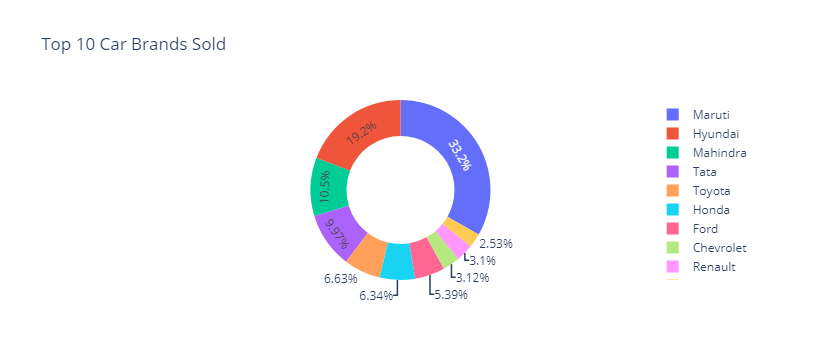

In [149]:
px.pie(data_frame = df, names = df.name.value_counts().head(10).index,
       values = df.name.value_counts().values[0:10],
       template='plotly',
     
      title = "Top 10 Car Brands Sold",hole = 0.6
      )

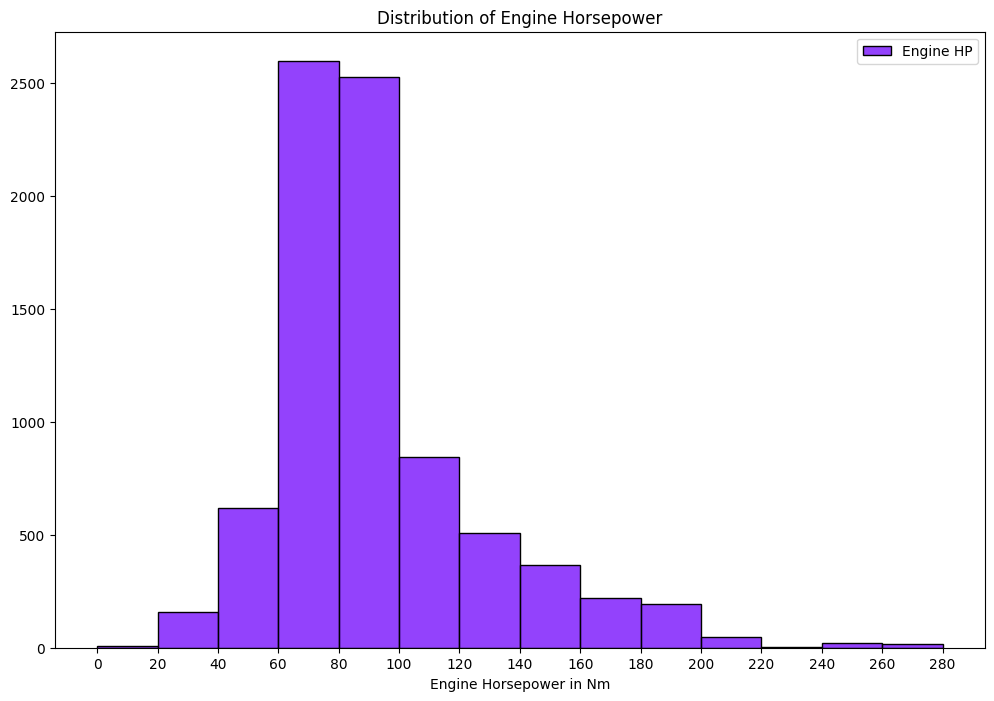

In [150]:
# Plotting the distribution of the employment period column
bins = np.arange(df.max_power.min(),df.max_power.max(),20)
sns.histplot(df.max_power, label="Engine HP",color="#6f03fc",bins=bins)
plt.xlabel("Engine Horsepower in Nm")
plt.xticks(bins)
plt.title('Distribution of Engine Horsepower')
plt.ylabel('')
plt.legend()
plt.show();

<Axes: xlabel='fuel', ylabel='km_driven'>

([0, 1, 2, 3],
 [Text(0, 0, 'Diesel'),
  Text(1, 0, 'Petrol'),
  Text(2, 0, 'LPG'),
  Text(3, 0, 'CNG')])

Text(0.5, 1.0, 'Kms Driven by Fuel Type')

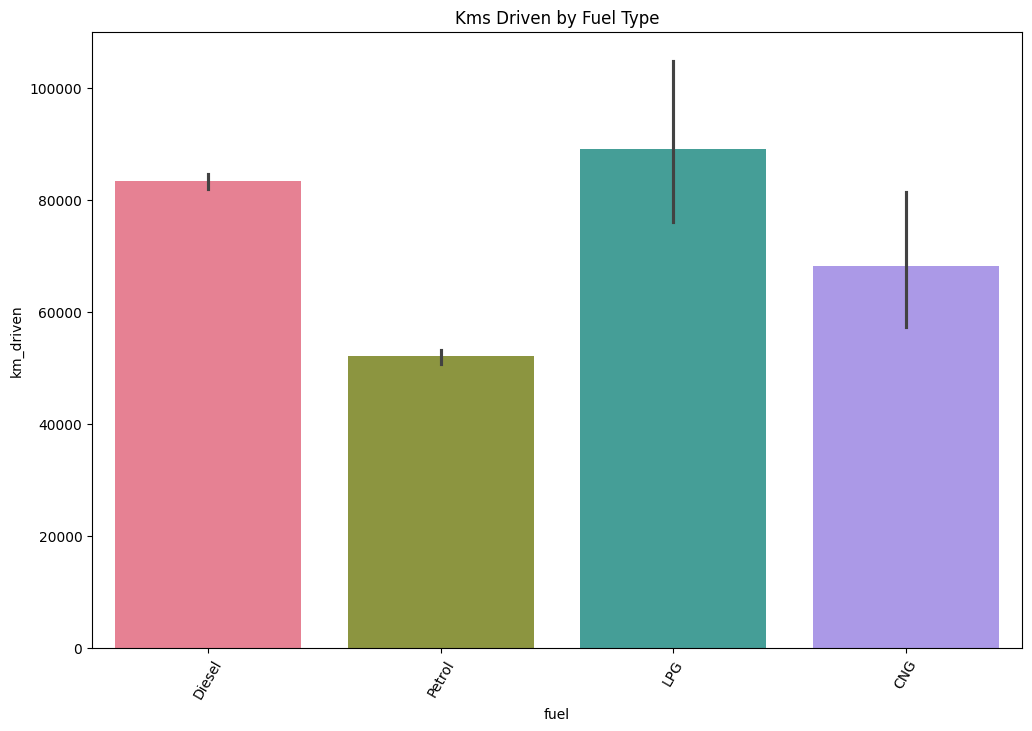

In [151]:
# Visualizing kms driven by fuel type
sns.barplot(x=df["fuel"], y=df["km_driven"], palette="husl")
plt.xticks(rotation=60)
plt.title("Kms Driven by Fuel Type")
plt.show()


<Axes: xlabel='fuel', ylabel='mileage'>

([0, 1, 2, 3],
 [Text(0, 0, 'Diesel'),
  Text(1, 0, 'Petrol'),
  Text(2, 0, 'LPG'),
  Text(3, 0, 'CNG')])

Text(0.5, 1.0, 'Mileage by Fuel Type')

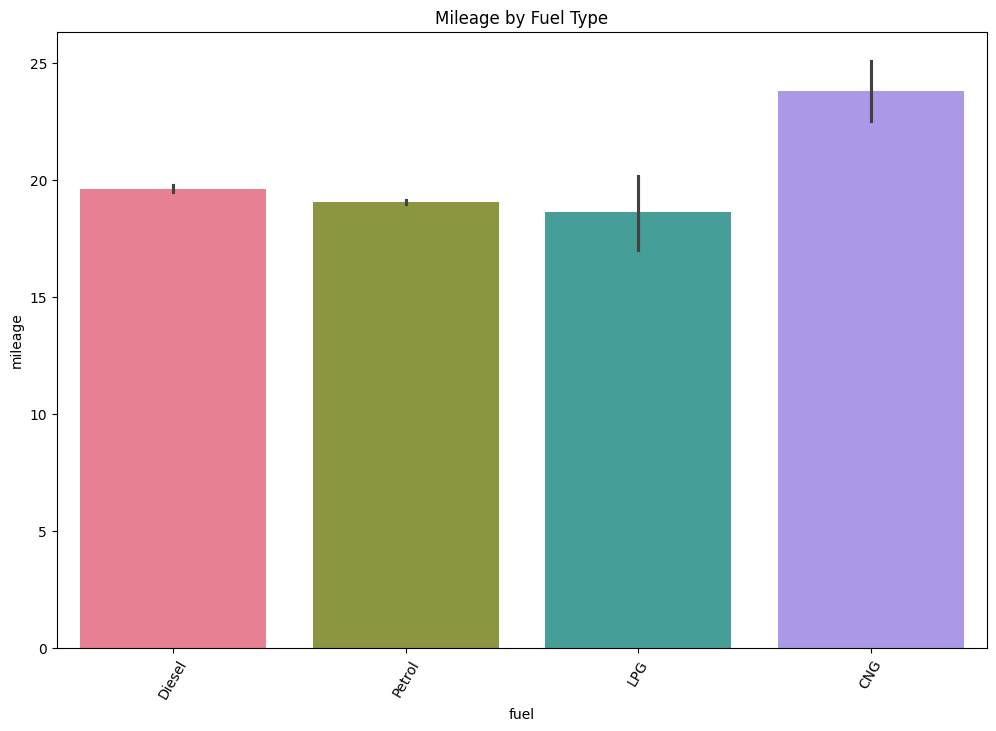

In [152]:
# Visualizing mileage by fuel type
sns.barplot(x=df["fuel"], y=df["mileage"], palette="husl")
plt.xticks(rotation=60)
plt.title("Mileage by Fuel Type")
plt.show()

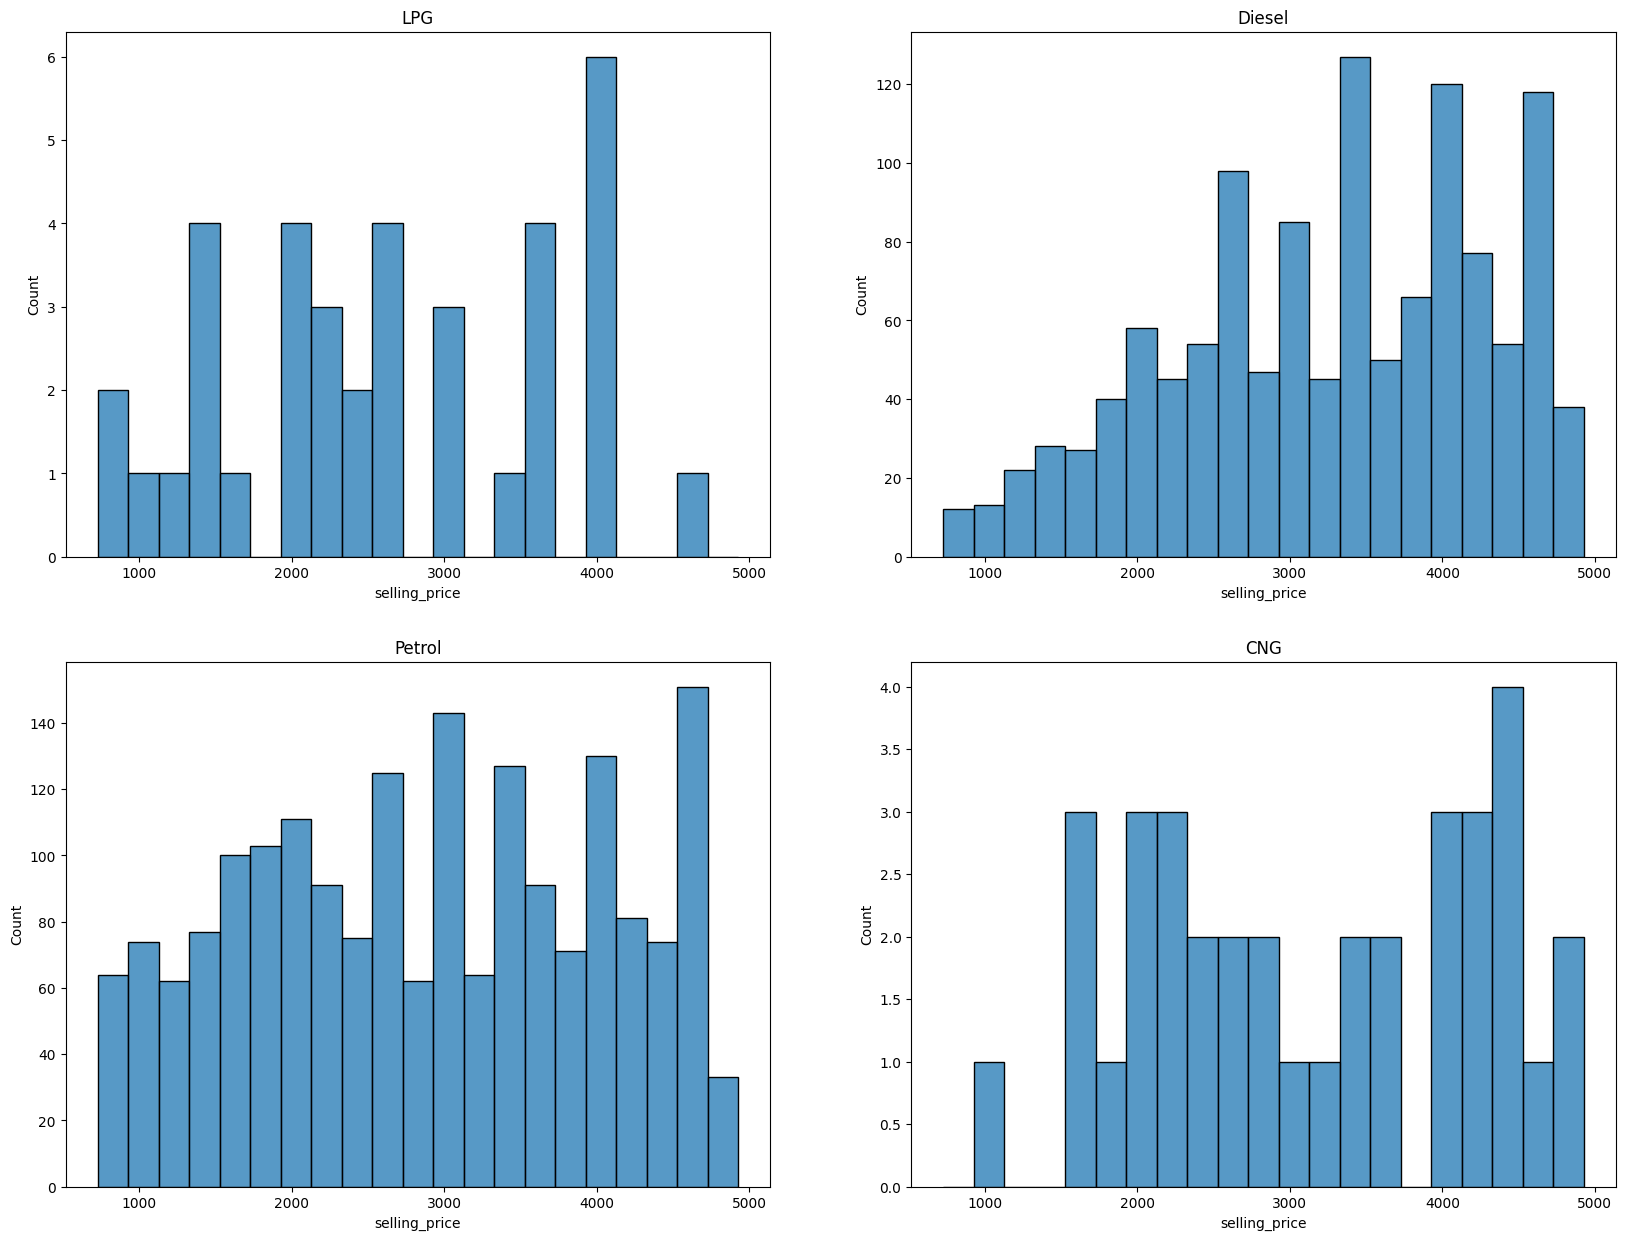

In [153]:
dfLPG = df[df.fuel=='LPG']
dfDiesel = df[df.fuel=='Diesel']
dfPetrol= df[df.fuel=='Petrol']
dfCNG = df[df.fuel=='CNG']
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,15))
bins = np.arange(dfLPG.selling_price.min(),dfLPG.selling_price.max(),200)
sns.histplot(dfLPG.selling_price,bins=bins,ax=ax1,palette='coolwarm')
sns.histplot(dfDiesel.selling_price,bins=bins,ax=ax2,palette='coolwarm')
sns.histplot(dfPetrol.selling_price,bins=bins,ax=ax3,palette='coolwarm')
sns.histplot(dfCNG.selling_price,bins=bins,ax=ax4,palette='coolwarm')
ax1.set_title('LPG')
ax2.set_title('Diesel')
ax3.set_title('Petrol')
ax4.set_title('CNG')
plt.show();

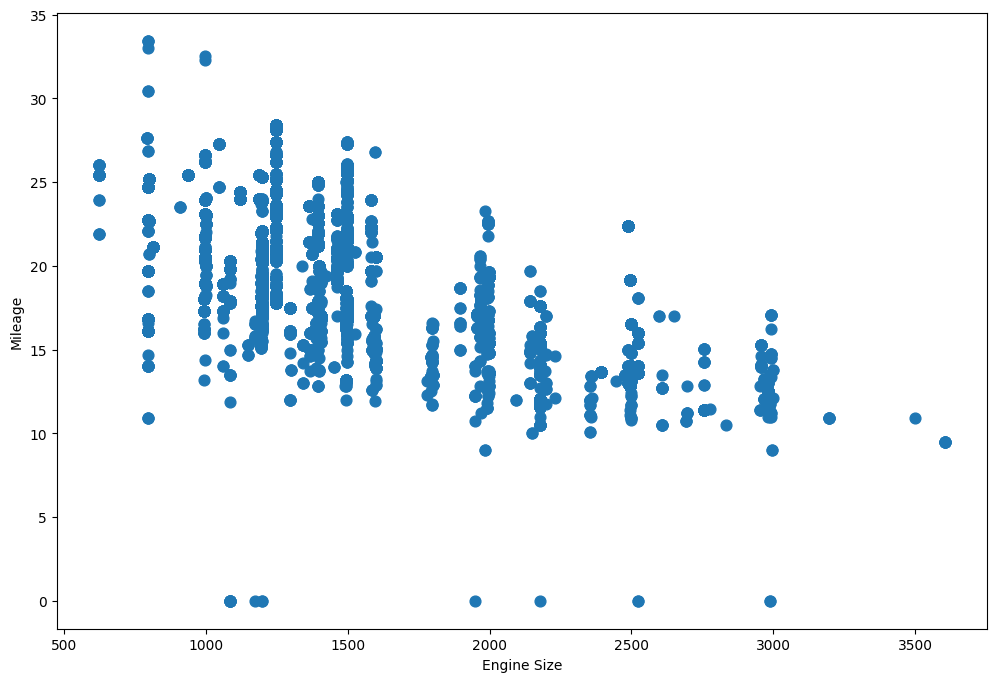

In [154]:
plt.scatter(df.engine, df.mileage, s=60)
plt.ylabel('Mileage')
plt.xlabel('Engine Size')
plt.show();

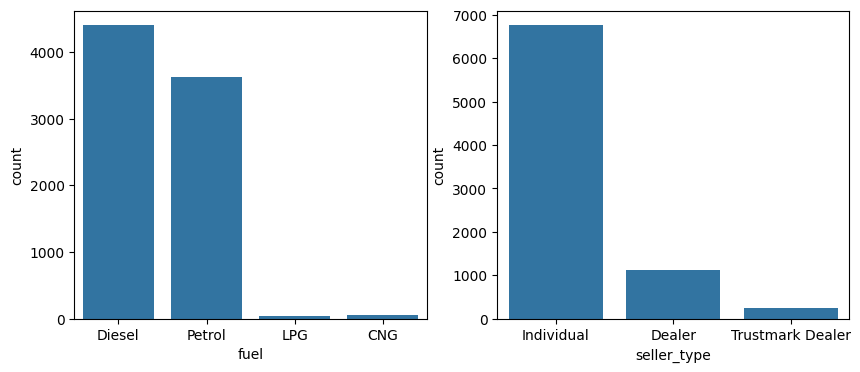

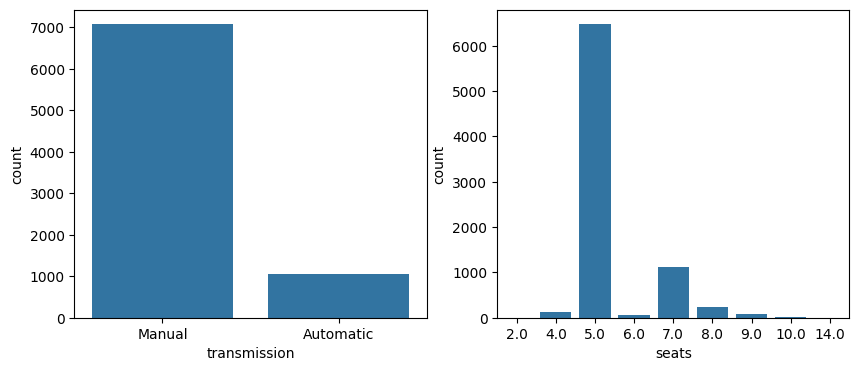

In [155]:
#Plotting 
cat_cols = ['fuel','seller_type','transmission', 'seats']
i=0
while i <4:
    fig = plt.figure(figsize=[10,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
plt.show();

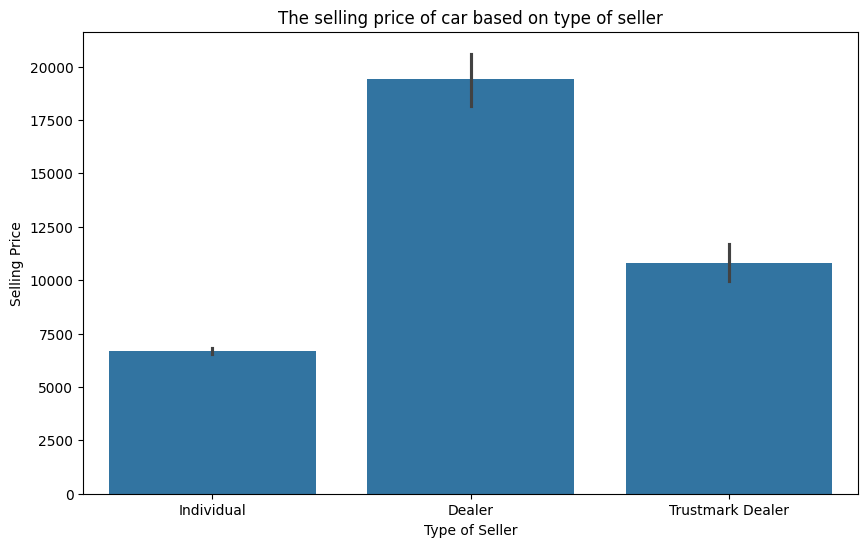

In [156]:
top_sell = df.sort_values(by='selling_price', ascending=False)
figure = plt.figure(figsize=(10,6))
sns.barplot(y=df.selling_price, x=df.seller_type)
plt.xticks()
plt.xlabel('Type of Seller')
plt.ylabel('Selling Price')
plt.title('The selling price of car based on type of seller')
plt.show();

In [157]:
df.selling_price.mean()

8571.718107689114

In [158]:
# # Plotting continues variables and the target outcomes
# vars_to_plot = ["max_power","km_driven","selling_price"]
# for i in vars_to_plot:
#     # Plotting a catplot
#     sns.catplot(x = "selling_price", y = i, data=df, kind="box",height=6)
#     plt.title(i)
#     # Showing concentration of data points with stripplot
#     sns.stripplot(x = "selling_price", y = i, data=df, jitter=0.06, alpha=0.03, color='k')
# plt.show();

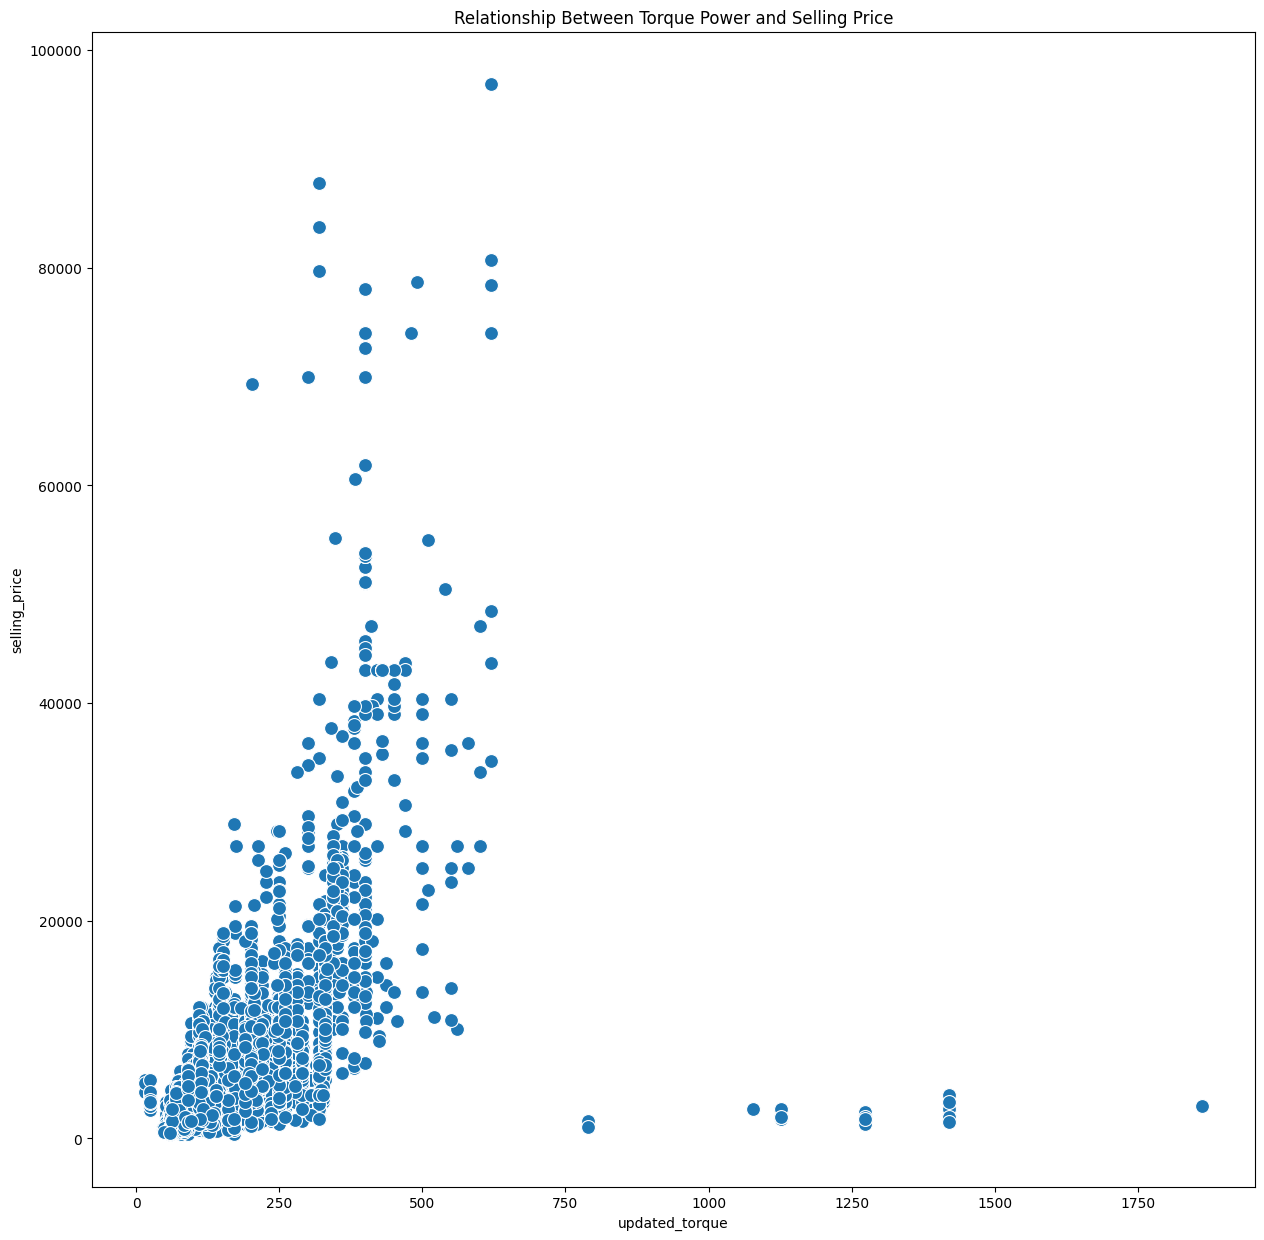

In [159]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='updated_torque',y='selling_price',data=df,s=100)
plt.title('Relationship Between Torque Power and Selling Price')
plt.show();

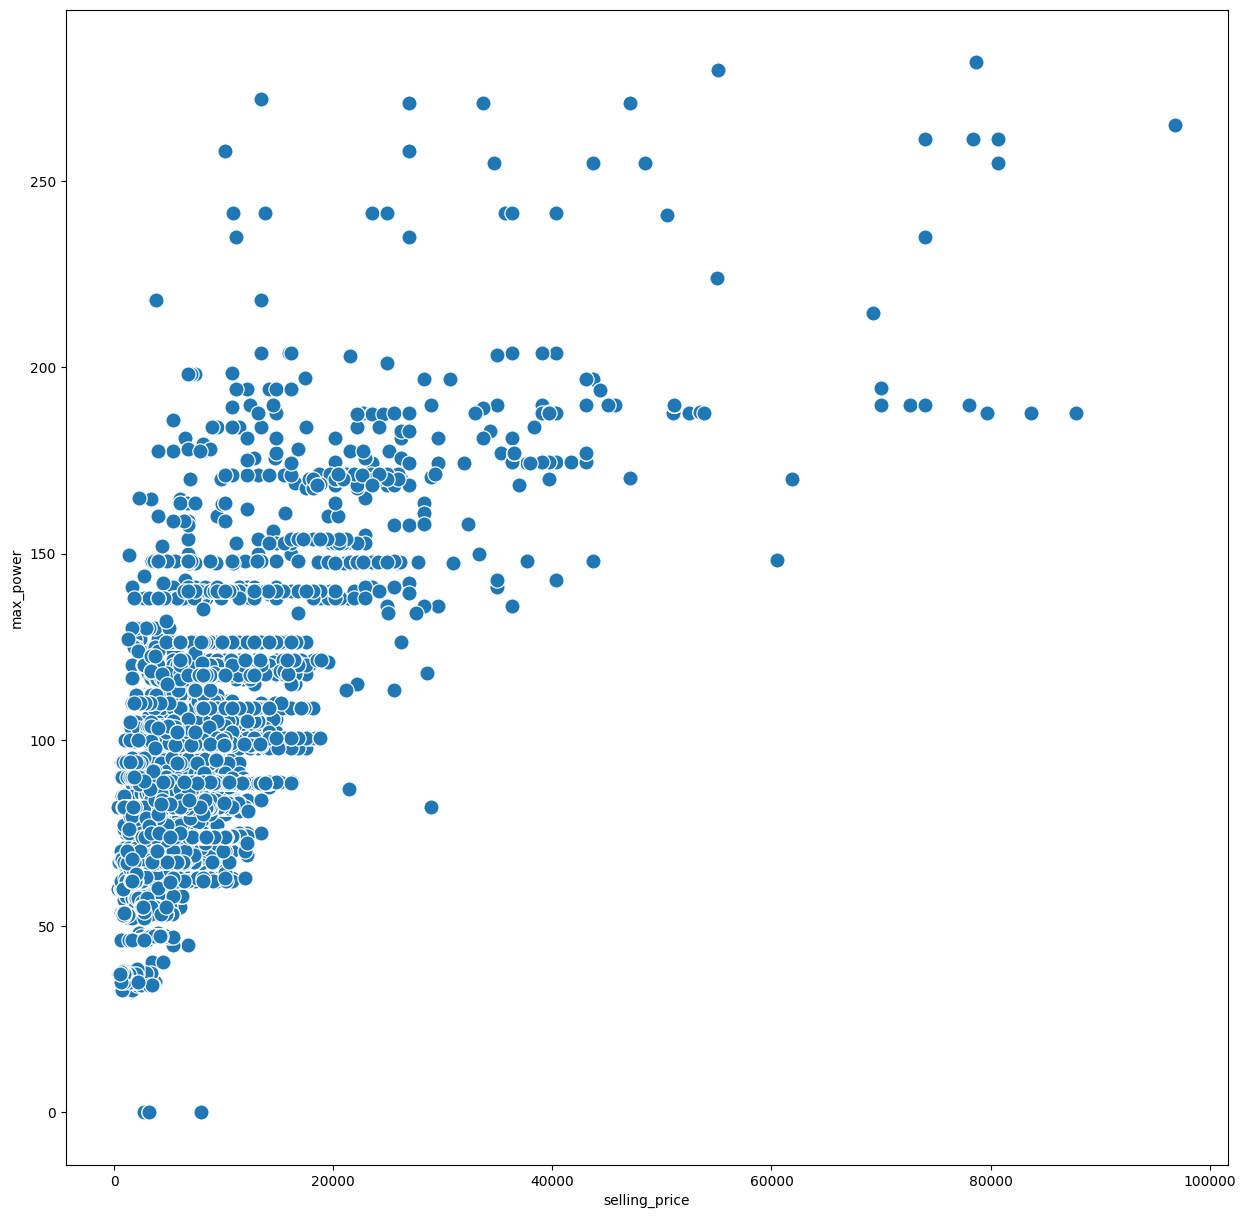

In [160]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='selling_price',y='max_power',s=120,data=df)
plt.show();

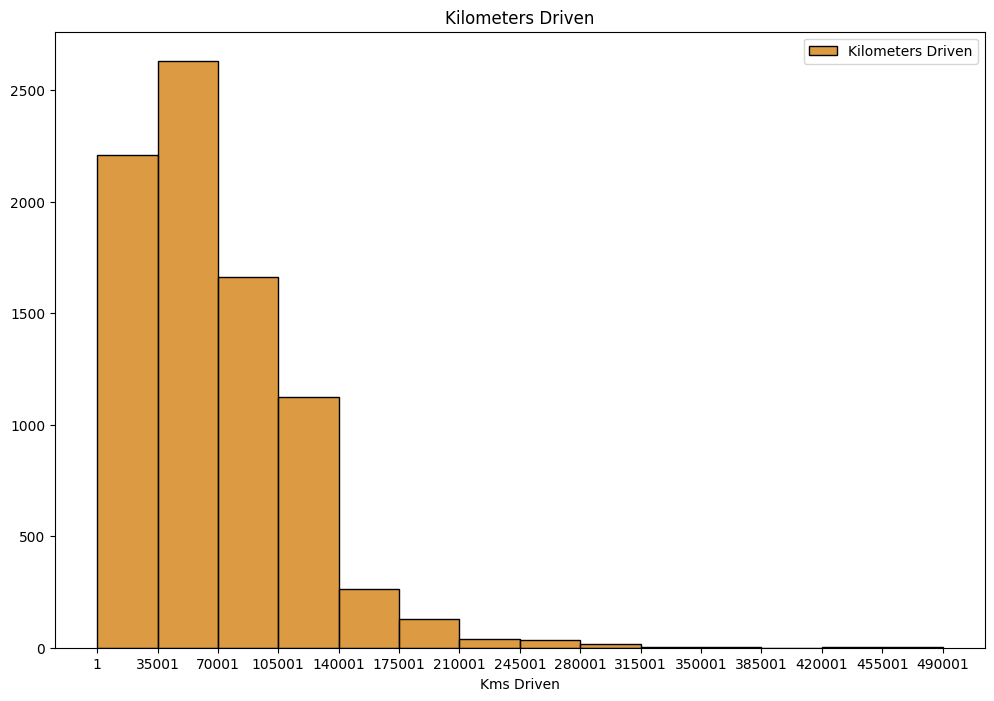

In [161]:
# Plotting the distribution of the employment period column
bins = np.arange(df.km_driven.min(),df.km_driven.max(),35000)
sns.histplot(df.km_driven, label="Kilometers Driven",color="#d17804",bins=bins)
plt.xlabel("Kms Driven")
plt.xticks(bins)
plt.title('Kilometers Driven')
plt.ylabel('')
plt.legend()
plt.show();

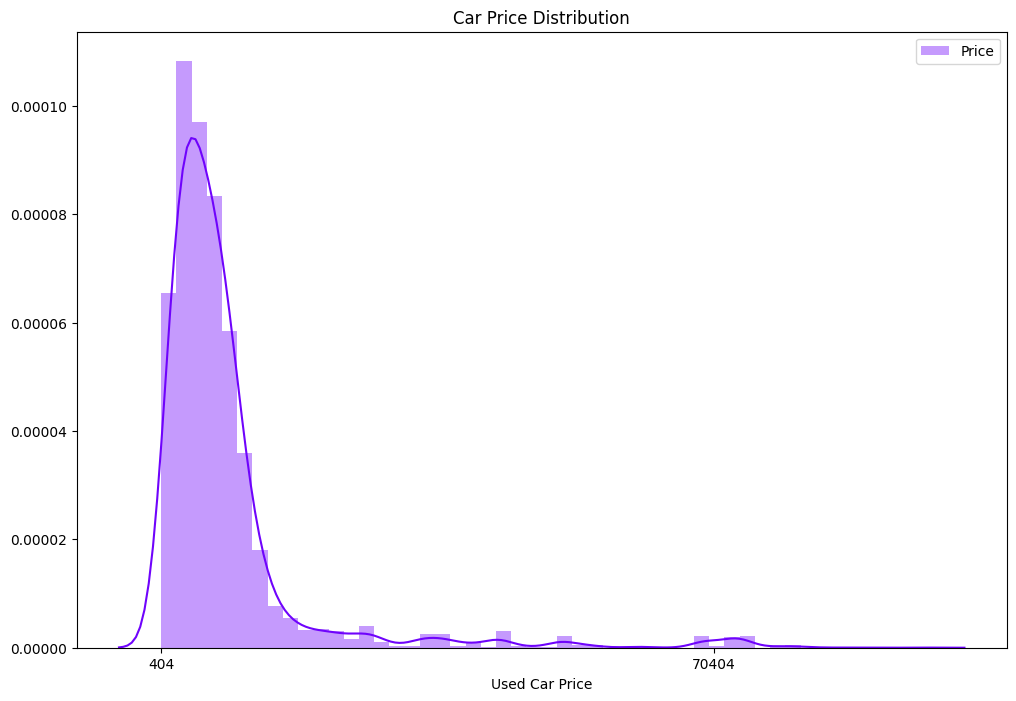

In [162]:
bins = np.arange(df.selling_price.min(),df.selling_price.max(),70000)
sns.distplot(df.selling_price, label="Price",color="#6f03fc")
plt.xlabel("Used Car Price")
plt.title('Car Price Distribution')
plt.ylabel('')
plt.xticks(bins)
plt.legend()
plt.show();

# Plotting the distribution of the selling price column


<Axes: xlabel='km_driven', ylabel='selling_price'>

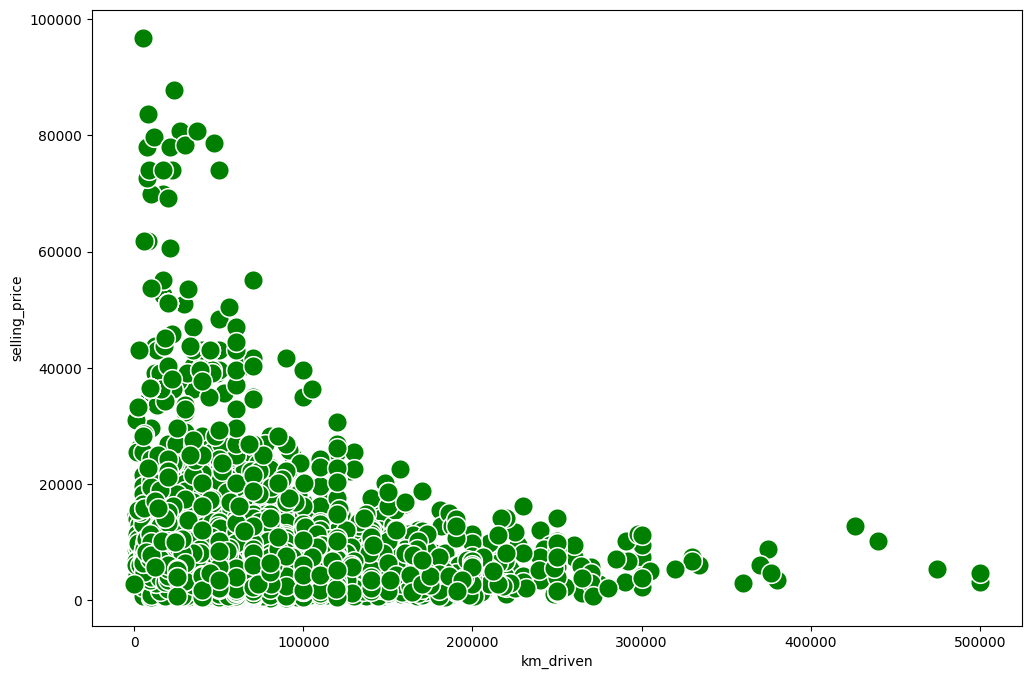

In [163]:
# Plotting the relationship between price and Kms driven
sns.scatterplot(x=df["km_driven"], y=df["selling_price"], color='green', s=200)
plt.show()

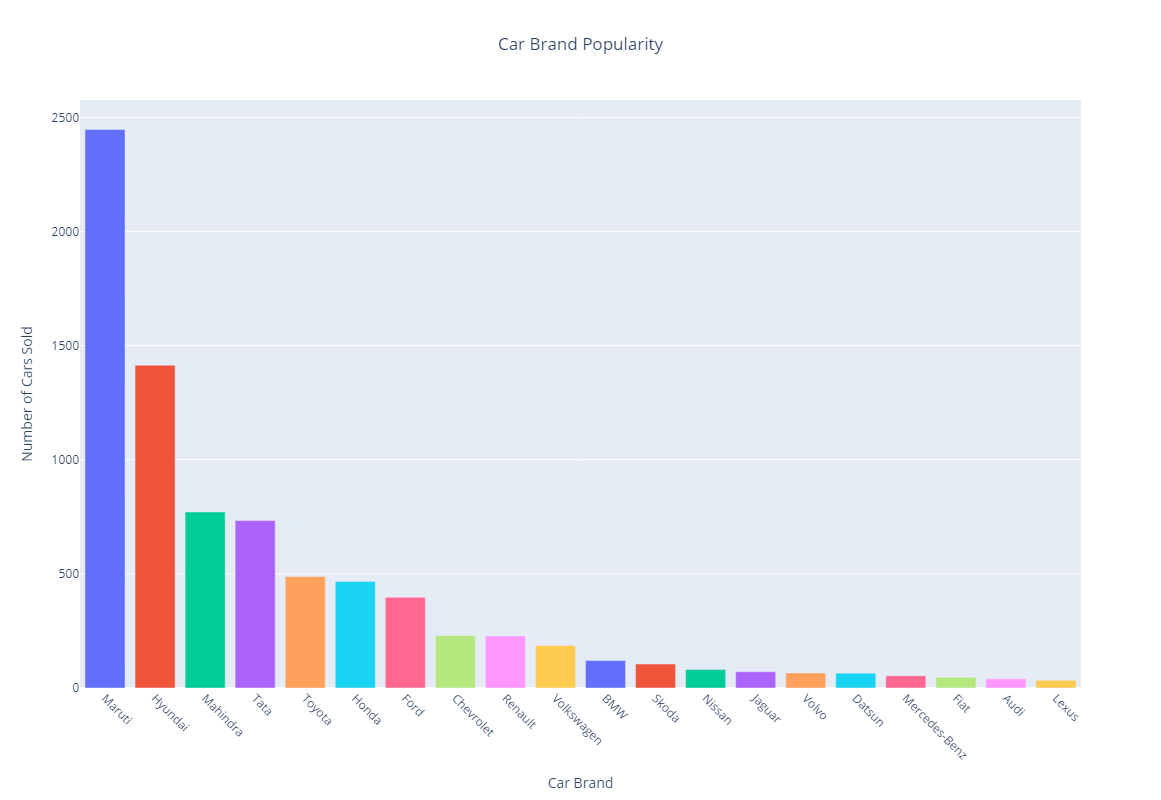

In [164]:
import plotly.express as px
import plotly.graph_objects as go

# Create a DataFrame for cars and how many were sold, limit to top 20
topv = df['name'].value_counts().reset_index().head(20)
topv.columns = ['Car Name', 'Count']  # Explicitly naming columns for clarity

# Create the bar plot using Plotly
fig = px.bar(topv, x='Car Name', y='Count', title='Car Brand Popularity', color='Car Name',
             color_discrete_sequence=px.colors.qualitative.Plotly)

# Update the layout for better visualization
fig.update_layout(
    xaxis_title="Car Brand",
    yaxis_title="Number of Cars Sold",
    title={'text': "Car Brand Popularity", 'x': 0.5, 'xanchor': 'center'},
    width=1200,
    height=800,
    xaxis=dict(
        tickangle=45,  # Rotate the x-axis labels
        tickfont=dict(size=12)  # Adjust the font size of the x-axis labels
    ),
    yaxis=dict(
        tickfont=dict(size=12)  # Adjust the font size of the y-axis labels
    ),
    showlegend=False  # Hide the legend to reduce clutter
)

# Customize the hover template
fig.update_traces(
    hovertemplate='Car Brand: %{x}<br>Number of Cars Sold: %{y}<extra></extra>'
)

# Show the plot
fig.show();

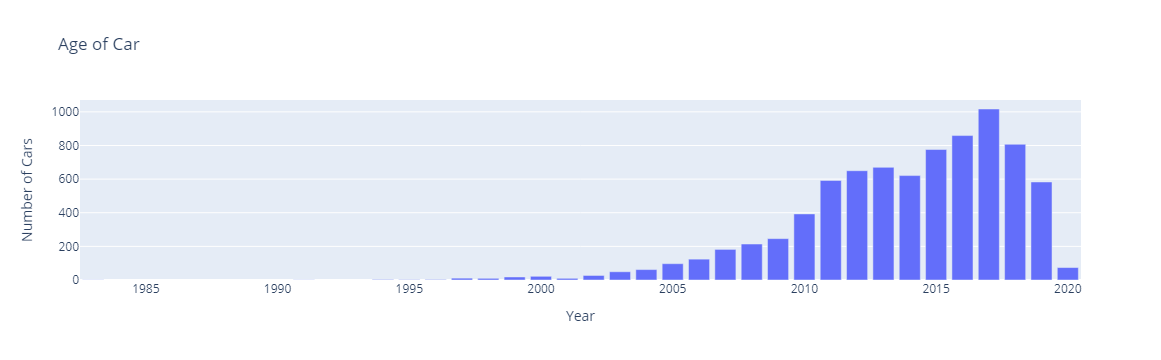

In [181]:
import plotly.express as px

# Count the occurrences of each year
df_count = df['year'].value_counts().reset_index()
df_count.columns = ['year', 'count']

fig = px.bar(df_count, x='year', y='count', title='Age of Car', labels={'count': 'Number of Cars', 'year': 'Year'})
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Cars')
fig.show();

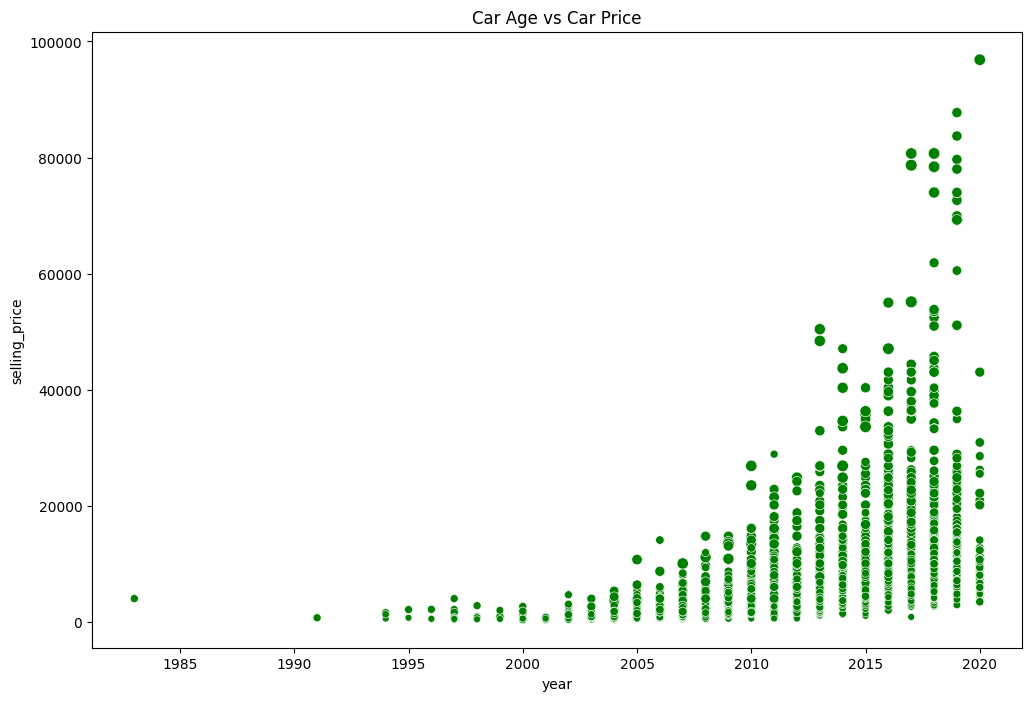

In [167]:
# Plotting the relationship between selling price, the car's age, and its engine size
sns.scatterplot(x=df["year"], y=df["selling_price"], size=df['max_power'], color='green', legend=False)
plt.title('Car Age vs Car Price')
plt.show();

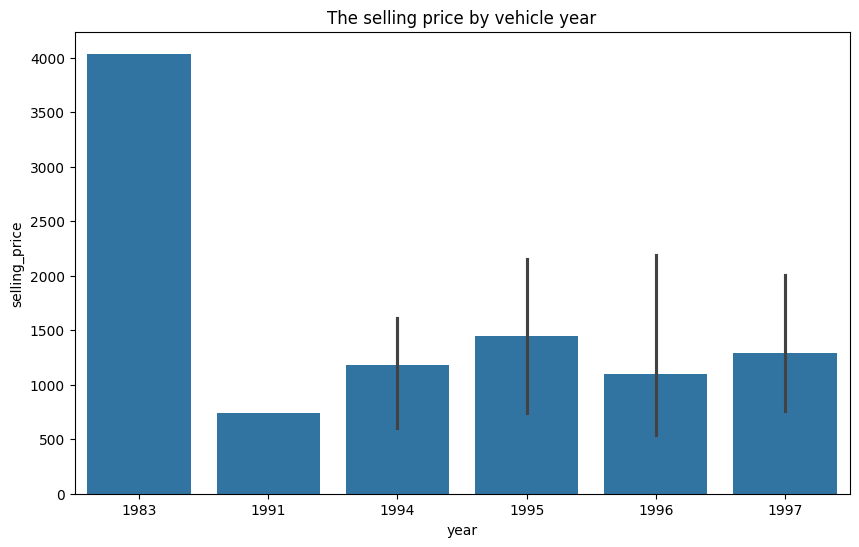

In [168]:
top_selling = df.sort_values(by='year', ascending=False).tail(20)
figure = plt.figure(figsize=(10,6))
sns.barplot(y=top_selling.selling_price, x=top_selling.year)
plt.xticks()
plt.xlabel('year')
plt.ylabel('selling_price')
plt.title('The selling price by vehicle year')
plt.show();

<Axes: ylabel='selling_price'>

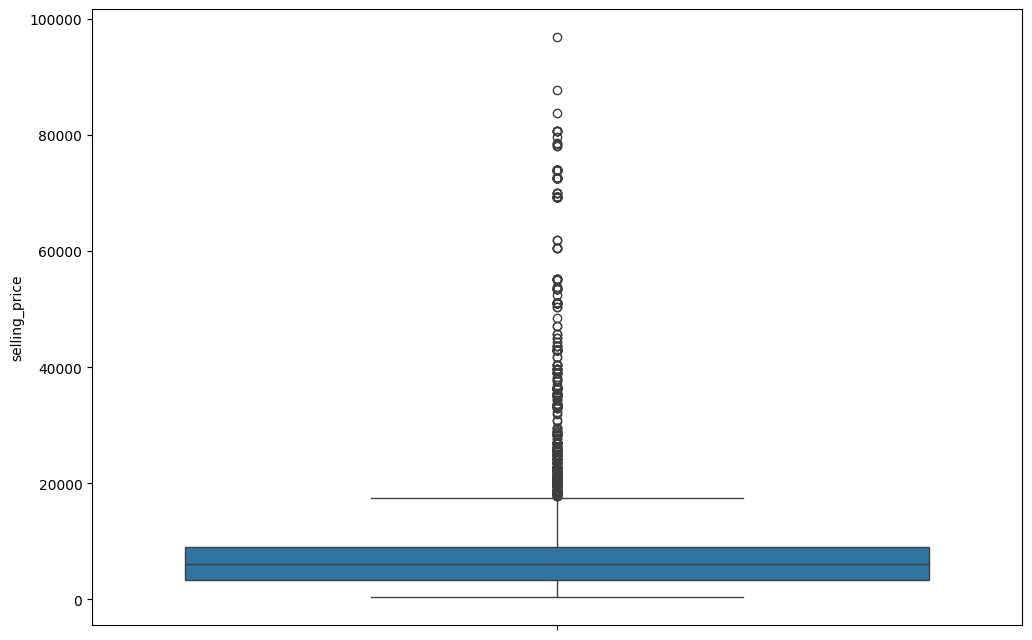

In [169]:
sns.boxplot(df['selling_price'])

<Axes: ylabel='max_power'>

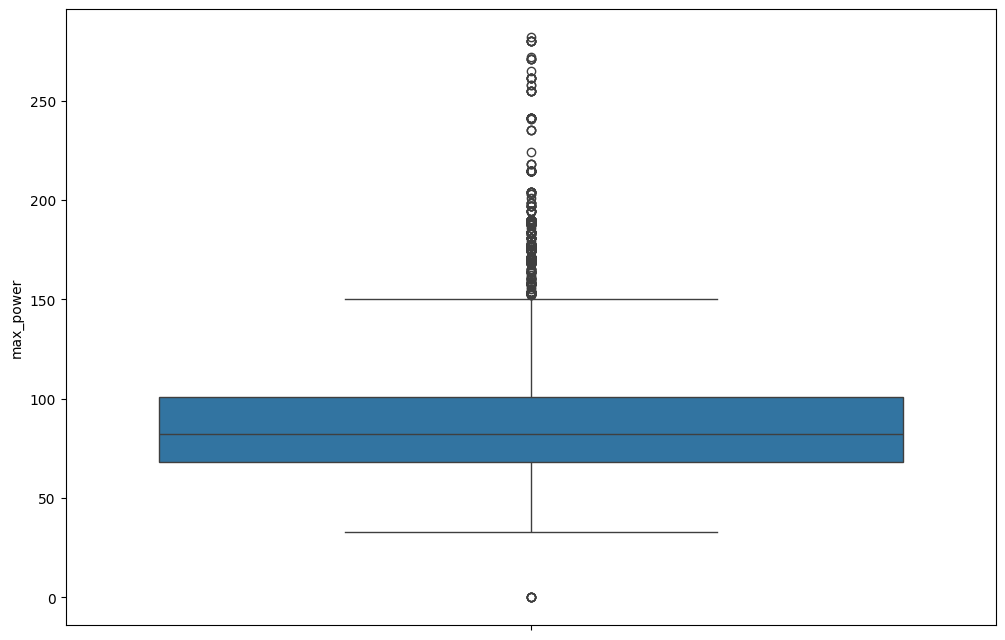

In [170]:
sns.boxplot(df['max_power'])

<Axes: ylabel='mileage'>

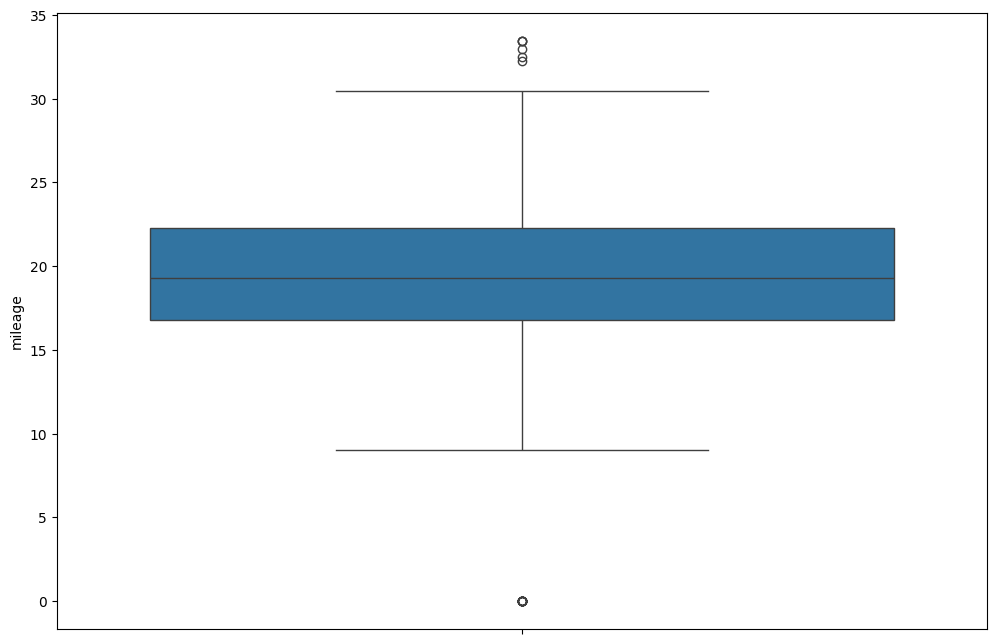

In [171]:
sns.boxplot(df['mileage'])

<Axes: ylabel='engine'>

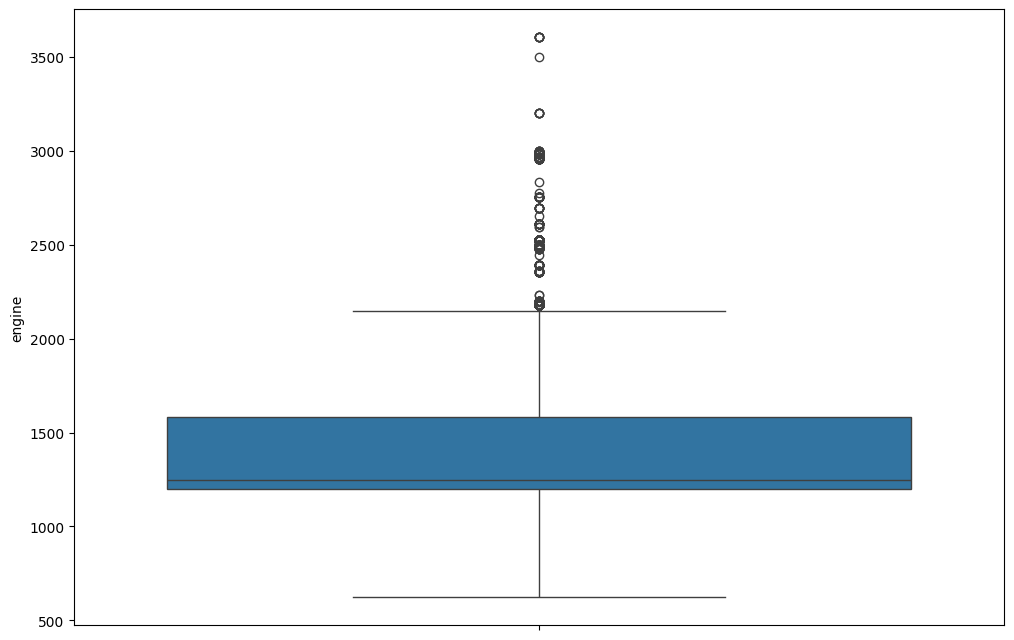

In [172]:
sns.boxplot(df['engine'])

<Axes: ylabel='updated_torque'>

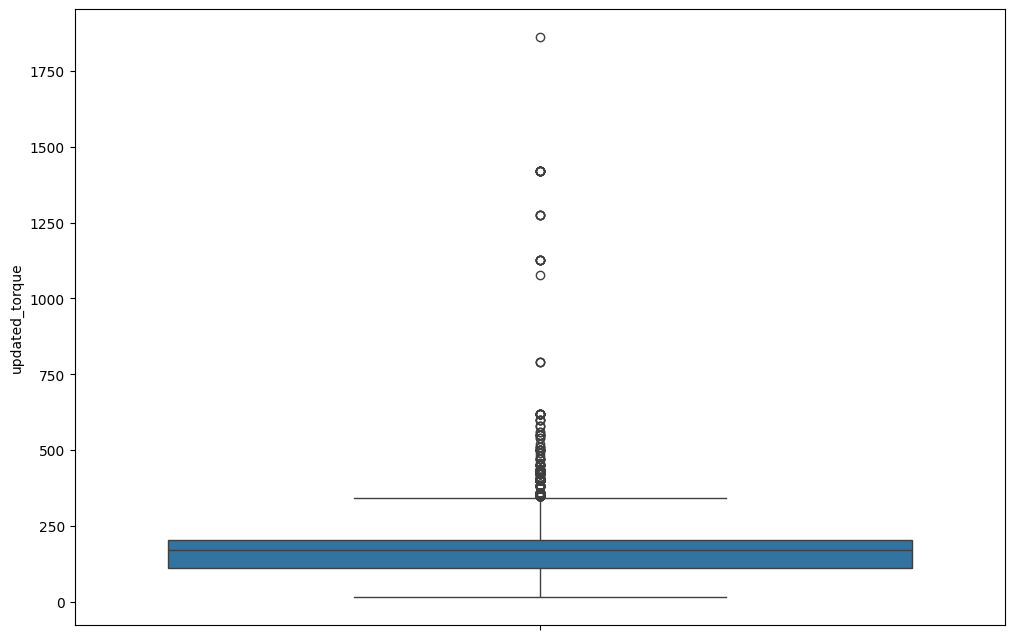

In [173]:
sns.boxplot(df['updated_torque'])

In [174]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'updated_torque', 'model'],
      dtype='object')

## Recommendation Charts

In [175]:
df['year'] = df['year'].astype('int')
print('Selling Price of Cars by Year')
display(df[["year",'name','selling_price']].groupby(["name",
                                                         "year"]).agg("sum").sort_values(by="selling_price",
                                                          ascending = True).head(10).style.background_gradient(cmap='Greens'))

#Comparing selling price with seller type
# sns.lineplot(df['year'],df['selling_price'],hue=df['seller_type'])
# plt.title('Does type of seller change the selling price?',fontsize=20)
# plt.xticks(fontsize=18)
# plt.xlabel(" ")
plt.show();


Selling Price of Cars by Year


<Axes: xlabel='owner', ylabel='km_driven'>

([0, 1, 2, 3, 4],
 [Text(0, 0, 'First Owner'),
  Text(1, 0, 'Second Owner'),
  Text(2, 0, 'Third Owner'),
  Text(3, 0, 'Fourth & Above Owner'),
  Text(4, 0, 'Test Drive Car')])

Text(0.5, 1.0, 'Seller Type vs. Km Driven Comparison')

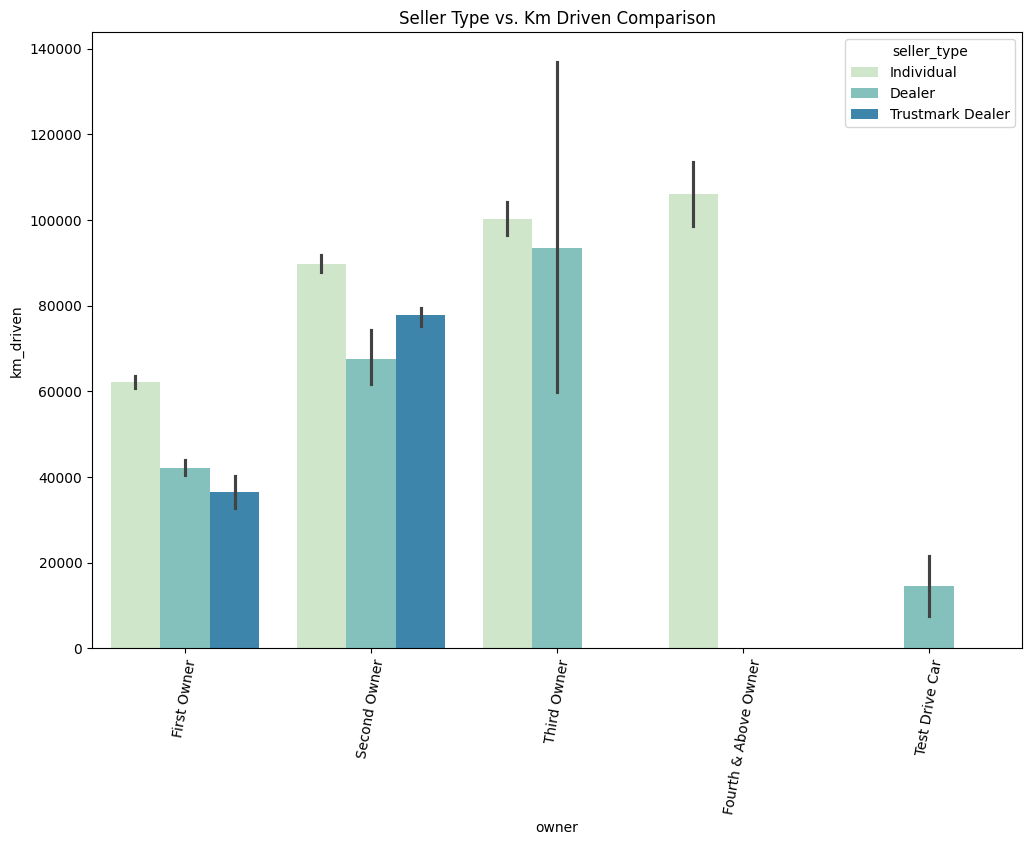

In [176]:
# Plotting km driven by owner type, colored by seller type
sns.barplot(x=df["owner"], y=df["km_driven"], hue=df["seller_type"], palette="GnBu")
plt.xticks(rotation=80)
plt.title("Seller Type vs. Km Driven Comparison")
plt.show()

,name,transmission,year,km_driven,fuel,seller_type,selling_price
2938,BMW,Automatic,2020,5000,Diesel,Individual,96855.264000
7713,Mercedes-Benz,Automatic,2017,37000,Diesel,Dealer,80712.720000
1071,BMW,Automatic,2018,28156,Diesel,Dealer,80712.720000
4101,BMW,Automatic,2018,28156,Diesel,Dealer,80712.720000
136,Mercedes-Benz,Automatic,2017,37000,Diesel,Dealer,80712.720000


,name,transmission,year,km_driven,fuel,seller_type,selling_price
6456,Jaguar,Automatic,2015,70000,Diesel,Individual,40356.360000
4680,Toyota,Automatic,2017,60000,Diesel,Dealer,36993.330000
4772,Audi,Automatic,2015,105000,Diesel,Dealer,36320.724000
4375,Mercedes-Benz,Automatic,2015,100000,Diesel,Individual,34975.512000
82,BMW,Automatic,2016,30000,Petrol,Individual,33630.300000


,name,transmission,year,km_driven,fuel,seller_type,selling_price
6724,Land,Automatic,2013,77500,Diesel,Individual,26904.240000
1676,Mercedes-Benz,Automatic,2011,110000,Diesel,Individual,22868.604000
4527,Mercedes-Benz,Automatic,2011,110000,Diesel,Individual,22868.604000
7381,Mahindra,Automatic,2016,91567,Diesel,Individual,17487.756000
778,Ford,Automatic,2013,110000,Diesel,Individual,14461.029000


,name,transmission,year,km_driven,fuel,seller_type,selling_price
3321,Audi,Automatic,2009,98000,Diesel,Individual,10896.217200
7905,Maruti,Manual,2014,141000,Diesel,Individual,9416.484000
4752,Toyota,Manual,2009,242000,Diesel,Individual,8743.878000
5302,Ford,Manual,2017,40000,Diesel,Individual,8407.575000
7916,Hyundai,Manual,2014,100000,Diesel,Individual,8071.272000


,name,transmission,year,km_driven,fuel,seller_type,selling_price
4952,Audi,Automatic,2019,23600,Petrol,Dealer,87748.178760
4950,Audi,Automatic,2019,7800,Petrol,Dealer,83712.542760
4951,Audi,Automatic,2019,11500,Petrol,Dealer,79676.906760
6220,Honda,Automatic,2019,24857,Petrol,Dealer,26904.240000
4383,Volkswagen,Manual,2019,5400,Diesel,Dealer,18160.362000


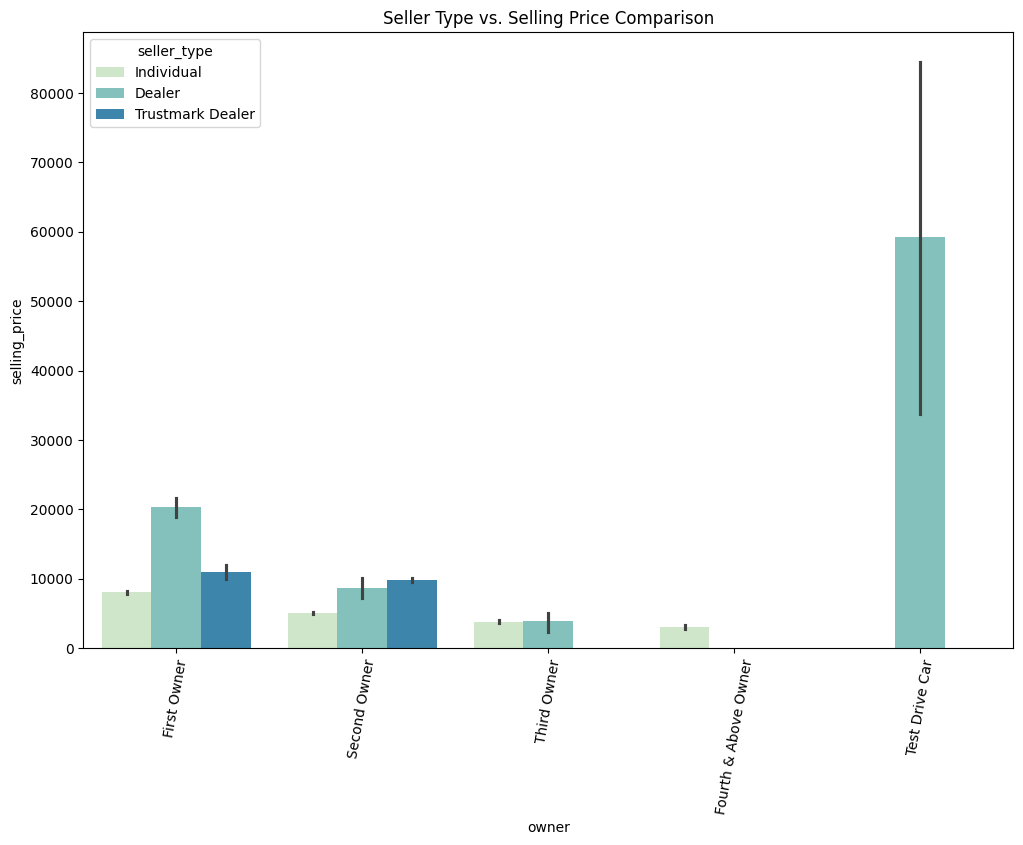

In [177]:
display(df[df["owner"]=="First Owner"][["name","transmission","year","km_driven","fuel","seller_type",
                                       "selling_price"]].sort_values(by="selling_price", ascending= False).head(5).style.background_gradient(cmap="GnBu"))
display(df[df["owner"]=="Second Owner"][["name","transmission","year","km_driven","fuel","seller_type",
                                       "selling_price"]].sort_values(by="selling_price", ascending= False).head(5).style.background_gradient(cmap="GnBu"))

display(df[df["owner"]=="Third Owner"][["name","transmission","year","km_driven","fuel","seller_type",
                                       "selling_price"]].sort_values(by="selling_price", ascending= False).head(5).style.background_gradient(cmap="GnBu"))

display(df[df["owner"]=="Fourth & Above Owner"][["name","transmission","year","km_driven","fuel","seller_type",
                                       "selling_price"]].sort_values(by="selling_price", ascending= False).head(5).style.background_gradient(cmap="GnBu"))

display(df[df["owner"]=="Test Drive Car"][["name","transmission","year","km_driven","fuel","seller_type",
                                       "selling_price"]].sort_values(by="selling_price", ascending= False).head(5).style.background_gradient(cmap="GnBu"))


# Plotting selling price by owner type, colored by seller type
sns.barplot(x=df["owner"], y=df["selling_price"], hue=df["seller_type"], palette="GnBu")
plt.xticks(rotation=80)
plt.title("Seller Type vs. Selling Price Comparison")
plt.show();

In [178]:
#Let's plot a comparison of car brands and their max selling prices
#We'll group the name and get the max and average selling price of each vehicle
print('Car Brands Highest, Lowest and Average Selling Price')
display(df[["name","selling_price",]].groupby(["name"]).agg(["max","mean","min"]).style.background_gradient(cmap="Blues"))
# here we are ploting these values using lineplot
#df[["name","selling_price",]].groupby(["name"]).agg(["max","mean","min"]).plot(kind="line",color =["red","#42f57b","blue"])
#plt.title("Which cars sell highest, average and minimum prices?", fontsize=20)

#plt.ylabel("selling_price",fontsize=9) 
#plt.xticks(rotation=80)

# #Plot a list of all the bestselling vehicles in the dataset
# print("Best Selling Cars")
# display(df.loc[df.groupby(df["name"])["selling_price"].idxmax()][["name",
#                                                                   "selling_price"]].style.background_gradient(
#     cmap="copper"))

plt.show();

Car Brands Highest, Lowest and Average Selling Price


,name,transmission,year,km_driven,fuel,seller_type,selling_price
2938,BMW,Automatic,2020,5000,Diesel,Individual,96855.264000
4101,BMW,Automatic,2018,28156,Diesel,Dealer,80712.720000
7713,Mercedes-Benz,Automatic,2017,37000,Diesel,Dealer,80712.720000
5258,Mercedes-Benz,Automatic,2017,37000,Diesel,Dealer,80712.720000
4766,BMW,Automatic,2018,27000,Diesel,Dealer,80712.720000


,name,transmission,year,km_driven,fuel,seller_type,selling_price
4952,Audi,Automatic,2019,23600,Petrol,Dealer,87748.178760
4950,Audi,Automatic,2019,7800,Petrol,Dealer,83712.542760
4951,Audi,Automatic,2019,11500,Petrol,Dealer,79676.906760
5256,Mercedes-Benz,Automatic,2019,17000,Petrol,Dealer,69951.024000
7710,Mercedes-Benz,Automatic,2019,17000,Petrol,Dealer,69951.024000


,name,transmission,year,km_driven,fuel,seller_type,selling_price
5749,Maruti,Manual,2014,35000,CNG,Individual,7331.405400
6488,Maruti,Manual,2019,35000,CNG,Individual,6187.961748
2527,Maruti,Manual,2018,70000,CNG,Individual,6187.961748
2767,Maruti,Manual,2018,50000,CNG,Individual,6053.454000
1350,Maruti,Manual,2019,60000,CNG,Individual,6053.454000


,name,transmission,year,km_driven,fuel,seller_type,selling_price
3042,Hyundai,Manual,2015,60000,LPG,Individual,5044.545000
3823,Hyundai,Manual,2012,30000,LPG,Individual,4708.242000
7642,Chevrolet,Manual,2012,70000,LPG,Individual,4035.636000
4545,Hyundai,Manual,2012,60000,LPG,Individual,4035.636000
1511,Maruti,Manual,2012,100000,LPG,Individual,4035.636000


,name,transmission,year,km_driven,fuel,seller_type,selling_price


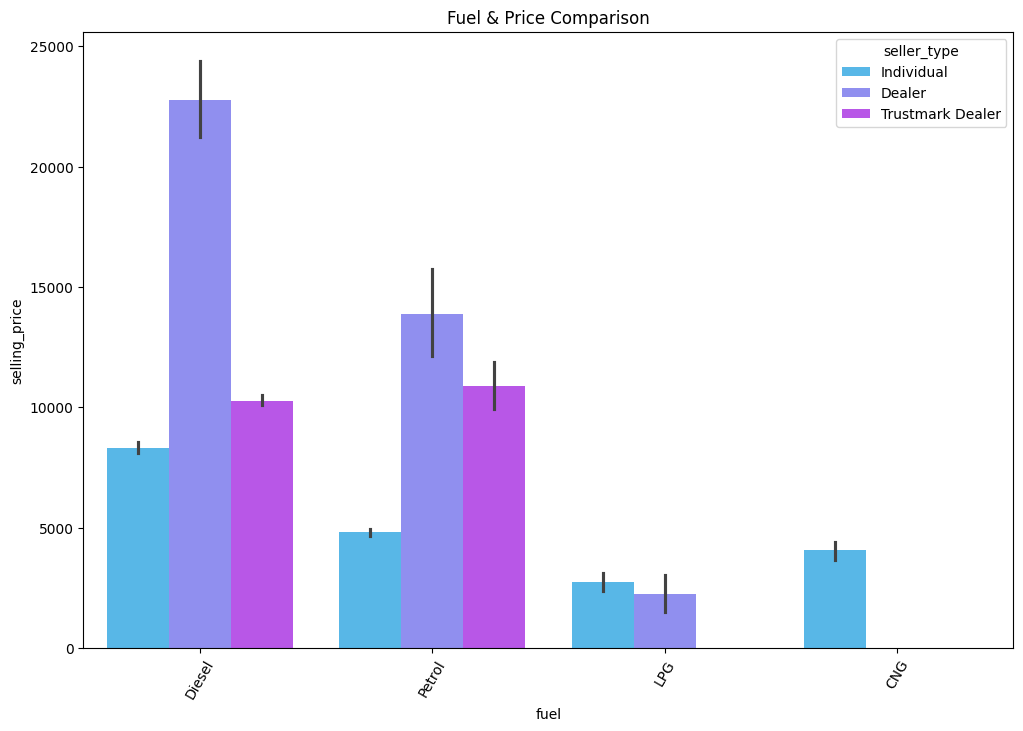

In [65]:
display(df[df["fuel"]=="Diesel"][["name","transmission","year","km_driven","fuel","seller_type",
                                       "selling_price"]].sort_values(by="selling_price", ascending= False).head(5).style.background_gradient(cmap="cool"))
display(df[df["fuel"]=="Petrol"][["name","transmission","year","km_driven","fuel","seller_type",
                                       "selling_price"]].sort_values(by="selling_price", ascending= False).head(5).style.background_gradient(cmap="cool"))

display(df[df["fuel"]=="CNG"][["name","transmission","year","km_driven","fuel","seller_type",
                                       "selling_price"]].sort_values(by="selling_price", ascending= False).head(5).style.background_gradient(cmap="cool"))

display(df[df["fuel"]=="LPG"][["name","transmission","year","km_driven","fuel","seller_type",
                                       "selling_price"]].sort_values(by="selling_price", ascending= False).head(5).style.background_gradient(cmap="cool"))

display(df[df["fuel"]=="Electric"][["name","transmission","year","km_driven","fuel","seller_type",
                                       "selling_price"]].sort_values(by="selling_price", ascending= False).head(5).style.background_gradient(cmap="cool"))


# Plotting selling price by fuel type, colored by seller type
sns.barplot(x=df["fuel"], y=df["selling_price"], hue=df["seller_type"], palette="cool")
plt.xticks(rotation=60)
plt.title("Fuel & Price Comparison")
plt.show();

## Machine Learning Module

In [66]:
df.drop(['model'],inplace=True,axis=1)

In [67]:
categories = df.select_dtypes(["object"]).columns
numerical = list(df.select_dtypes(["float64","int64"]).columns)
print(f"Number of numerical columns: {len(numerical)}")
print(f"Number of categorical columns: {len(categories)}")

Number of numerical columns: 7
Number of categorical columns: 5


In [68]:
# OneHotEncoding the categorical variables
df = pd.get_dummies(df, columns=categories, drop_first=True)
print(f"The dataset shape after OneHotEncoding is: {df.shape}")

The dataset shape after OneHotEncoding is: (8124, 49)


In [69]:
#Selecting the target and independent variables
X = df.iloc[:,2:]
y =  df.iloc[:,1]
X
y
X.shape
y.shape

,km_driven,mileage,engine,max_power,seats,updated_torque,name_Ashok,name_Audi,name_BMW,name_Chevrolet,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,145500,23.40,1248.0,74.00,5.0,190.00,False,False,False,False,...,True,False,False,True,False,True,False,False,False,False
1,120000,21.14,1498.0,103.52,5.0,250.00,False,False,False,False,...,True,False,False,True,False,True,False,True,False,False
2,140000,17.70,1497.0,78.00,5.0,124.46,False,False,False,False,...,False,False,True,True,False,True,False,False,False,True
3,127000,23.00,1396.0,90.00,5.0,219.52,False,False,False,False,...,True,False,False,True,False,True,False,False,False,False
4,120000,16.10,1298.0,88.20,5.0,112.70,False,False,False,False,...,False,False,True,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,110000,18.50,1197.0,82.85,5.0,113.70,False,False,False,False,...,False,False,True,True,False,True,False,False,False,False
8124,119000,16.80,1493.0,110.00,5.0,235.20,False,False,False,False,...,True,False,False,True,False,True,True,False,False,False
8125,120000,19.30,1248.0,73.90,5.0,190.00,False,False,False,False,...,True,False,False,True,False,True,False,False,False,False
8126,25000,23.57,1396.0,70.00,5.0,140.00,False,False,False,False,...,True,False,False,True,False,True,False,False,False,False


0       6053.45400
1       4977.28440
2       2125.43496
3       3026.72700
4       1748.77560
           ...    
8123    4304.67840
8124    1816.03620
8125    5138.70984
8126    3901.11480
8127    3901.11480
Name: selling_price, Length: 8124, dtype: float64

(8124, 47)

(8124,)

#### Scaling the data (standardizing)

In [70]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X = SC.fit_transform(X)


#### Splitting the data (Training dataset and Testing Dataset)

In [71]:
#Splitting the data set for train/test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=5)

### Creating & Training the Models

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [73]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,updated_torque
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,2013.805145,8571.718108,69303.928237,19.413469,1452.824963,91.225129,5.405465,179.940519
std,4.044115,10757.882803,47640.408539,3.974708,498.194262,35.213540,0.948793,107.788823
min,1983.000000,403.550148,1.000000,0.000000,624.000000,0.000000,2.000000,14.900000
25%,2011.000000,3430.277148,35000.000000,16.800000,1197.000000,68.100000,5.000000,112.000000
50%,2015.000000,6053.454000,60000.000000,19.300000,1248.000000,82.000000,5.000000,170.000000
75%,2017.000000,9080.181000,98000.000000,22.277500,1582.000000,101.000000,5.000000,205.000000
max,2020.000000,96855.264000,500000.000000,33.440000,3604.000000,282.000000,14.000000,1862.000000


In [74]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Create a list of regressors to be tested with the dataset
regressors = [['RandomForest:', RandomForestRegressor()],
              ['LinearRegression:', LinearRegression()],
              ['SupportVectorMachine:', SVR()],
              ['DecisionTree:', DecisionTreeRegressor()],
              ['XGBoostRegressor:', XGBRegressor()],
              ['GradientBoostingRegressor:', GradientBoostingRegressor()]]

# Create a dataframe for predictions and fill in the actual data for comparison
predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test

# Create a dataframe to store the metrics results
metrics_df = pd.DataFrame()

# Loop through all regressors, train, test, and validate the regressor
for name, regressor in regressors:
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    accuracyMAE = mean_absolute_error(y_test, predictions)
    accuracyRMSE = mean_squared_error(y_test, predictions, squared=False)
    R2 = r2_score(y_test, predictions)
    cv_score = cross_val_score(regressor, X_test, y_test, cv=10, scoring='max_error')
    scores_df = pd.DataFrame([[name.strip(" :"), accuracyRMSE, accuracyMAE, R2, abs(cv_score.mean())]],
                             columns=['Classifier', 'AccuracyRMSE', 'AccuracyMAE', 'R2', 'CV_Max_Error'])
    metrics_df = pd.concat([metrics_df, scores_df], ignore_index=True)

# Display the metrics DataFrame
metrics_df


RandomForestRegressor()

LinearRegression()

SVR()

DecisionTreeRegressor()

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

GradientBoostingRegressor()

,Classifier,AccuracyRMSE,AccuracyMAE,R2,CV_Max_Error
0,RandomForest,2433.715049,1132.808890,0.952982,2.570612e+04
1,LinearRegression,5041.477080,2558.078271,0.798238,5.943366e+17
2,SupportVectorMachine,11460.427772,5144.636708,-0.042616,6.799929e+04
3,DecisionTree,2786.756246,1234.766261,0.938352,3.754487e+04
4,XGBoostRegressor,2298.340847,1129.365922,0.958067,2.969374e+04
5,GradientBoostingRegressor,2808.141954,1629.569949,0.937402,2.553642e+04


In [75]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test,predictions)

0.3221984008780445

## Risidual Modeling 

In [76]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_test-y_pred_test),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

Train R2-score : 0.99
Test R2-score : 0.95
Train CV scores : [0.93570594 0.94475717 0.94116623 0.9489544  0.96842541]
Train CV mean : 0.95


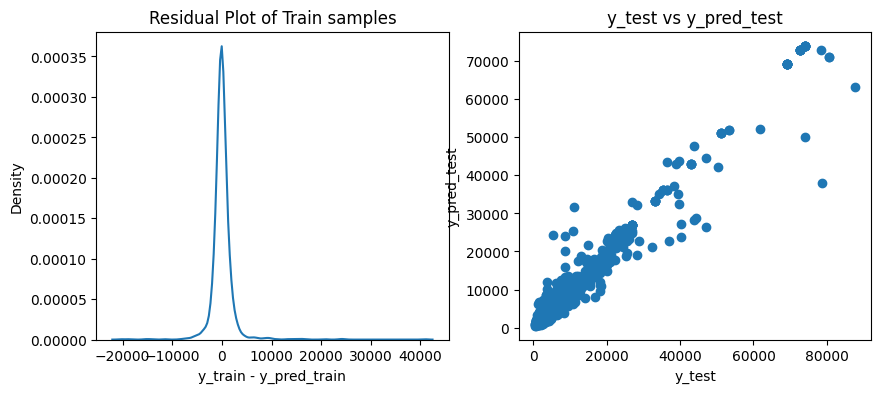

Train R2-score : 0.99
Test R2-score : 0.96
Train CV scores : [0.92884254 0.94591068 0.95091905 0.94993141 0.96791732]
Train CV mean : 0.95


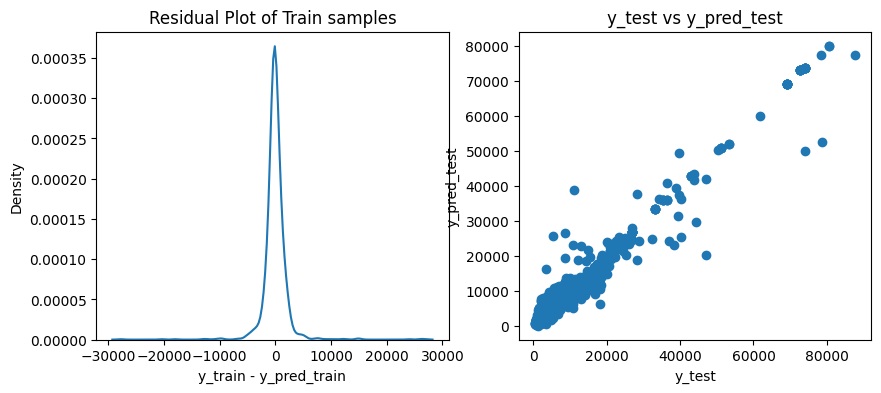

In [77]:
#Plotting risidual samples to determine if Random Forest or XGBoost are better ML candidates
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
car_pred_model(rf,"Random_Forest.pkl")
#XGBoost
from xgboost import XGBRegressor
XG = XGBRegressor()
car_pred_model(XG,"XGBoost_regressor.pkl")

## Hyper-Paramater Tuning 

### XGBoost Tuning

In [78]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

XGB = XGBRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
#Type of booster
booster = ['gbtree','dart']
# Number of parellel trees
num_parallel_tree = [5]
# Maximum number of levels in the tree structure
max_depth=list(range(2,8,2))
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "booster": booster,
              "max_depth":max_depth,
            'num_parallel_tree': num_parallel_tree}

XGB_rs = RandomizedSearchCV(
    estimator = XGB, param_distributions = param_grid,n_iter=10,n_jobs=6,scoring='neg_mean_absolute_error')

In [79]:
XGB_rs.fit(X_test,y_test)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=6,
                   param_distributions={'booster': ['gbtree', 'dart'],
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [2, 4, 6],
                                        'num_parallel_tree': [5]},
                   scoring='neg_mean_absolute_error')

# Warning: This next step can take 1 hour (my computer has 36GB RAM and a dedicated graphics card)

In [80]:
y_pred = XGB_rs.predict(X_test)
cross_val = cross_val_score(XGB_rs ,X_train ,y_train ,cv=10)

In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
#from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

print(f"Our R2 is: {r2_score(y_test, y_pred)}")
print(f"Our MAE is: {mean_absolute_error(y_test, y_pred)}")
print(f"Our MSRE is: {mean_squared_error(y_test, y_pred, squared=False)}")
#print(f"Our CV Accuracy Score is: {cross_val_score(XGB_rs)}")

Our R2 is: 0.9974754604439534
Our MAE is: 397.0823337770198
Our MSRE is: 563.9358881908149


In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = [
    {'n_estimators': [30, 60, 100], 
     'max_features': [0.3, 0.5, 0.7],  # The correct values for max_features should be between 0 and 1
     'min_samples_leaf': [2, 3, 5], 
     'oob_score': [True]},
    
    {'bootstrap': [False], 
     'n_estimators': [30, 60, 100], 
     'max_features': [0.3, 0.5, 0.7],  # The correct values for max_features should be between 0 and 1
     'min_samples_leaf': [2, 3, 5], 
     'oob_score': [True]},
]

rf = RandomForestRegressor(random_state=666)

%time grid_search = GridSearchCV(rf, params, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 1 ms


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=666),
             param_grid=[{'max_features': [0.3, 0.5, 0.7],
                          'min_samples_leaf': [2, 3, 5],
                          'n_estimators': [30, 60, 100], 'oob_score': [True]},
                         {'bootstrap': [False], 'max_features': [0.3, 0.5, 0.7],
                          'min_samples_leaf': [2, 3, 5],
                          'n_estimators': [30, 60, 100], 'oob_score': [True]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [83]:
m = grid_search.best_estimator_

In [84]:
m

RandomForestRegressor(max_features=0.7, min_samples_leaf=2, oob_score=True,
                      random_state=666)

In [85]:

RF = RandomForestRegressor(max_features=0.7, min_samples_leaf=2, oob_score=True,
                      random_state=666)

In [86]:
RF.fit(X_train, y_train)

RandomForestRegressor(max_features=0.7, min_samples_leaf=2, oob_score=True,
                      random_state=666)

In [87]:
y_pred = RF.predict(X_test)

In [88]:
print(f'This is my Predicted data: {y_pred[2]:0.2f}')
print(f'This is my Real data: {y_test[2]}')

This is my Predicted data: 10075.97
This is my Real data: 2125.43496


In [89]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

2548.815549238639

### Random Forest Tuning

In [90]:
#Importing regressor model
from sklearn.ensemble import RandomForestRegressor
regressorRF = RandomForestRegressor(n_estimators=3000, random_state=42,max_depth=25,max_features='log2',
                                   bootstrap=False)
regressorRF.fit(X_train, y_train)


# from sklearn.linear_model import LinearRegression

# regressorL = LinearRegression()
# regressorL.fit(X, y)

RandomForestRegressor(bootstrap=False, max_depth=25, max_features='log2',
                      n_estimators=3000, random_state=42)

In [91]:
min_impurity_decrease=200

In [92]:
y_pred = regressorRF.predict(X_test)
cross_val = cross_val_score(regressorRF, X_train ,y_train ,cv=10)

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

print(f"Our R2 is: {r2_score(y_test, y_pred)}")
print(f"Our MAE is: {mean_absolute_error(y_test, y_pred)}")
print(f"Our MSRE is: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Our CV Accuracy Score is: {cross_val.mean()}")

Our R2 is: 0.9608618095907435
Our MAE is: 1067.2106482676352
Our MSRE is: 2220.43985725546
Our CV Accuracy Score is: 0.9560686224253839


## Neural Network 

In [94]:
# Initialising the ANN
model = tf.keras.models.Sequential()

In [95]:
# Adding the input layer and the first hidden layer
model.add(tf.keras.layers.Dense(units=25, activation = 'relu'))

In [96]:
# Adding the second hidden layer
model.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))

In [97]:
# Adding the third hidden layer
model.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))

In [98]:
# Adding the fourth hidden layer
model.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))

In [99]:
# Adding the output layer
model.add(tf.keras.layers.Dense(units = 1))

In [100]:
# Compiling the mofe;
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [101]:
model.fit(X_train, y_train, batch_size = 10, epochs = 200)

Epoch 1/200
650/650 ━━━━━━━━━━━━━━━━━━━━ 2s 661us/step - loss: 152980032.0000
Epoch 2/200
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 28351496.0000
Epoch 3/200
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 18930566.0000
Epoch 4/200
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 14325196.0000
Epoch 5/200
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 15567614.0000
Epoch 6/200
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 13644259.0000
Epoch 7/200
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 14191765.0000
Epoch 8/200
650/650 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - loss: 13726291.0000
Epoch 9/200
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 12453936.0000
Epoch 10/200
650/650 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - loss: 13132140.0000
Epoch 11/200
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 13023983.0000
Epoch 12/200
650/650 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - loss: 12557151.0000
Epoch 13/200
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 12243965

In [102]:
# Predicting with the ANN
y_pred = model.predict(X_test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [103]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

print(f"Our R2 is: {r2_score(y_test, y_pred)}")
print(f"Our MAE is: {mean_absolute_error(y_test, y_pred)}")
print(f"Our MSRE is: {mean_squared_error(y_test, y_pred, squared=False)}")

Our R2 is: 0.941678275199372
Our MAE is: 1518.8663281857944
Our MSRE is: 2710.527533138063
